In [16]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as ET
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

In [17]:
Data = pd.read_pickle('.\DataFrames\TempAndRadnCleaned.pkl')

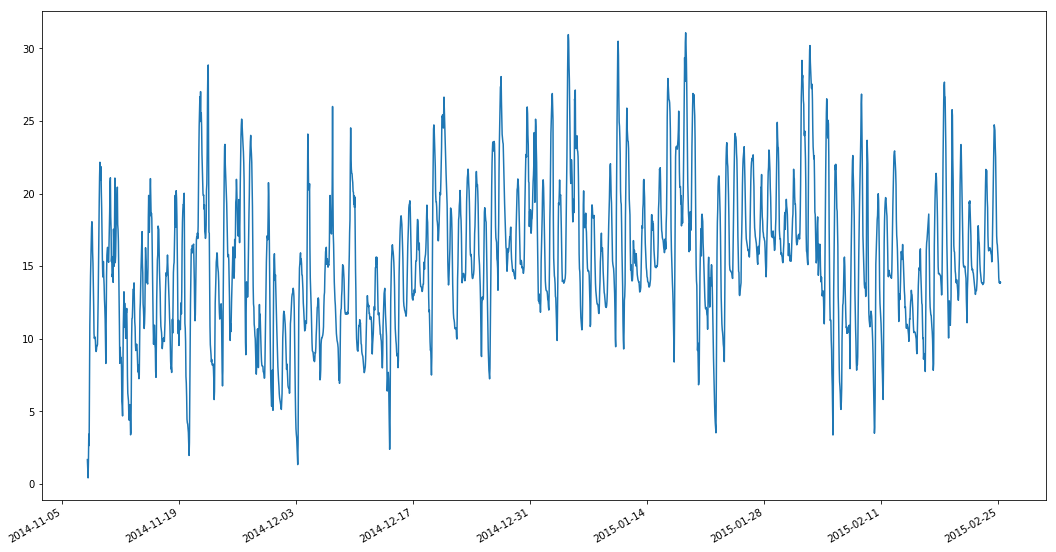

In [18]:
HourlyTemperature = Data['AirTemperature'].resample('h').mean() #convert more frequent data to hourly means
HourlyTemperature.where(HourlyTemperature>-20,np.nan,inplace=True)  #convert errant data to nan
HourlyTemperature.dropna(inplace=True)                              #remove dates with nan data
HourlyTemperature = HourlyTemperature.squeeze()                     #remove column dymension (i.e convert dataframe to series)
HourlyTemperature.plot(figsize=(18,10))

In [19]:
HourlyTemperature.name = 'AirTemp'

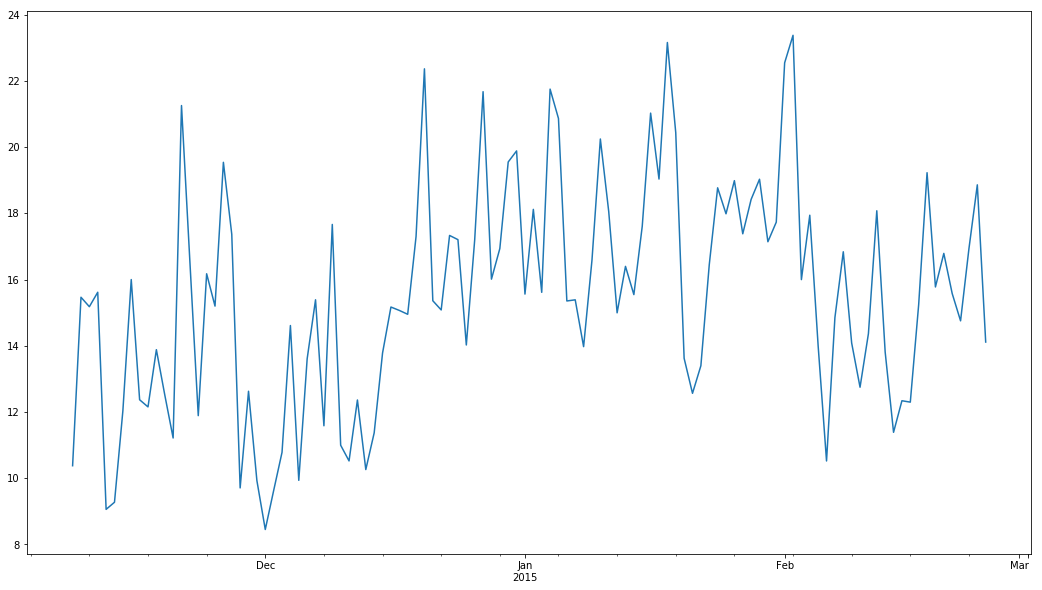

In [20]:
DailyMeanTemp = HourlyTemperature.resample('D').mean()
DailyMeanTemp.plot(figsize=(18,10))

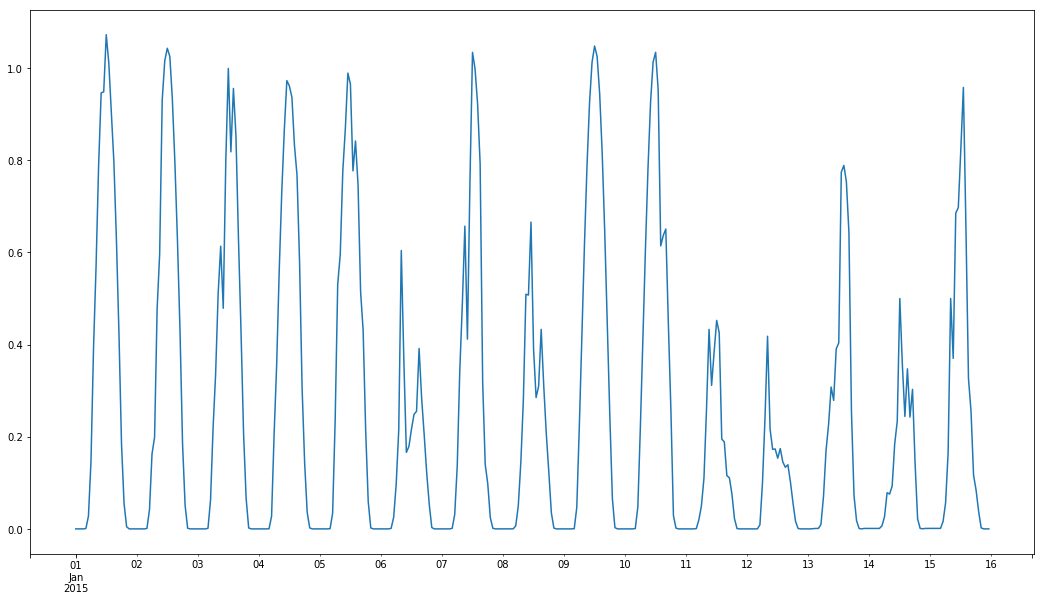

In [21]:
HourlyRadiation = Data['IncomingRadnKW'].resample('h').mean()
HourlyRadiation.where(HourlyRadiation>-20,np.nan,inplace=True)  #convert errant data to nan
HourlyRadiation.dropna(inplace=True)                              #remove dates with nan data
HourlyRadiation = HourlyRadiation.squeeze()                     #remove column dymension (i.e convert dataframe to series)
HourlyRadiation.loc['2015-01-01':'2015-01-15'].plot(figsize=(18,10))

In [22]:
HourlyRadiation.name = 'Radn'

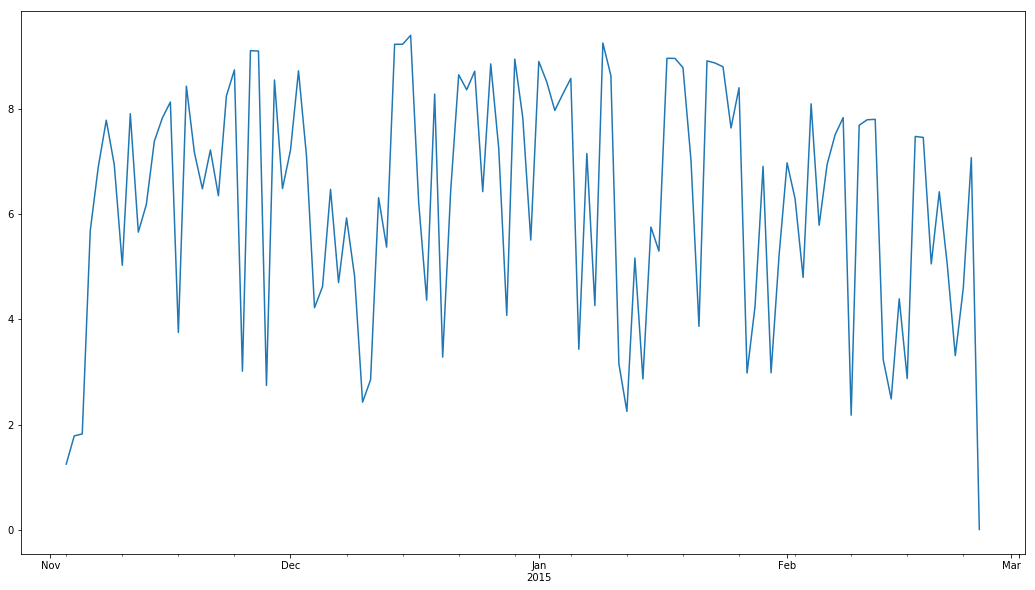

In [23]:
DailyRadiation = HourlyRadiation.resample('D').sum()
DailyRadiation.plot(figsize=(18,10))

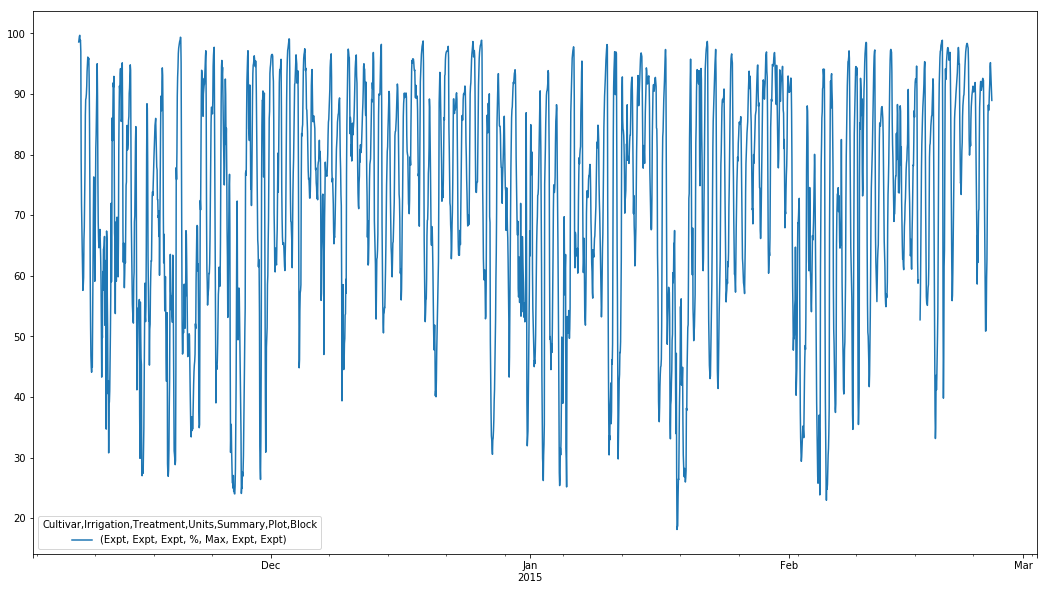

In [24]:
HourlyHumidity = Data['RelativeHumidity'].resample('h').mean()
HourlyHumidity.plot(figsize=(18,10))

In [25]:
HourlyMetData = pd.DataFrame(index = Data.loc['2014-11-07':,:].resample('h').mean().index)
HourlyMetData.loc[:,'AirTemperature'] = Data.loc['2014-11-07':,'AirTemperature'].resample('h').mean()
HourlyMetData.loc[:,'IncomingRadnMJ'] = Data.loc['2014-11-07':,'IncomingRadnMJ'].resample('h').sum()
HourlyMetData.loc[:,'Rainfall'] = Data.loc['2014-11-07':,'Rainfall'].resample('h').sum()
HourlyMetData.loc[:,'RelativeHumidity'] = Data.loc['2014-11-07':,'RelativeHumidity'].resample('h').sum()
HourlyMetData.loc[:,'Windspeed'] = Data.loc['2014-11-07':,'Windspeed'].resample('h').mean()

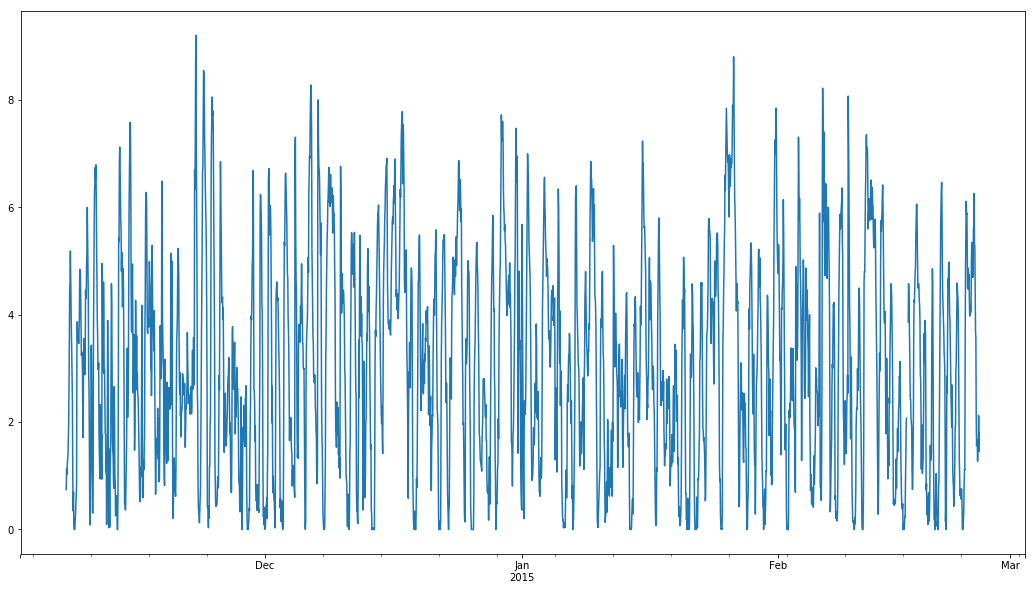

In [26]:
HourlyMetData.loc[:,'Windspeed'].plot(figsize=(18,10))

In [27]:
WindDates = ['2014-10-01 00:00',
'2014-10-01 01:00',
'2014-10-01 02:00',
'2014-10-01 03:00',
'2014-10-01 04:00',
'2014-10-01 05:00',
'2014-10-01 06:00',
'2014-10-01 07:00',
'2014-10-01 08:00',
'2014-10-01 09:00',
'2014-10-01 10:00',
'2014-10-01 11:00',
'2014-10-01 12:00',
'2014-10-01 13:00',
'2014-10-01 14:00',
'2014-10-01 15:00',
'2014-10-01 16:00',
'2014-10-01 17:00',
'2014-10-01 18:00',
'2014-10-01 19:00',
'2014-10-01 20:00',
'2014-10-01 21:00',
'2014-10-01 22:00',
'2014-10-01 23:00',
'2014-10-02 00:00',
'2014-10-02 01:00',
'2014-10-02 02:00',
'2014-10-02 03:00',
'2014-10-02 04:00',
'2014-10-02 05:00',
'2014-10-02 06:00',
'2014-10-02 07:00',
'2014-10-02 08:00',
'2014-10-02 09:00',
'2014-10-02 10:00',
'2014-10-02 11:00',
'2014-10-02 12:00',
'2014-10-02 13:00',
'2014-10-02 14:00',
'2014-10-02 15:00',
'2014-10-02 16:00',
'2014-10-02 17:00',
'2014-10-02 18:00',
'2014-10-02 19:00',
'2014-10-02 20:00',
'2014-10-02 21:00',
'2014-10-02 22:00',
'2014-10-02 23:00',
'2014-10-03 00:00',
'2014-10-03 01:00',
'2014-10-03 02:00',
'2014-10-03 03:00',
'2014-10-03 04:00',
'2014-10-03 05:00',
'2014-10-03 06:00',
'2014-10-03 07:00',
'2014-10-03 08:00',
'2014-10-03 09:00',
'2014-10-03 10:00',
'2014-10-03 11:00',
'2014-10-03 12:00',
'2014-10-03 13:00',
'2014-10-03 14:00',
'2014-10-03 15:00',
'2014-10-03 16:00',
'2014-10-03 17:00',
'2014-10-03 18:00',
'2014-10-03 19:00',
'2014-10-03 20:00',
'2014-10-03 21:00',
'2014-10-03 22:00',
'2014-10-03 23:00',
'2014-10-04 00:00',
'2014-10-04 01:00',
'2014-10-04 02:00',
'2014-10-04 03:00',
'2014-10-04 04:00',
'2014-10-04 05:00',
'2014-10-04 06:00',
'2014-10-04 07:00',
'2014-10-04 08:00',
'2014-10-04 09:00',
'2014-10-04 10:00',
'2014-10-04 11:00',
'2014-10-04 12:00',
'2014-10-04 13:00',
'2014-10-04 14:00',
'2014-10-04 15:00',
'2014-10-04 16:00',
'2014-10-04 17:00',
'2014-10-04 18:00',
'2014-10-04 19:00',
'2014-10-04 20:00',
'2014-10-04 21:00',
'2014-10-04 22:00',
'2014-10-04 23:00',
'2014-10-05 00:00',
'2014-10-05 01:00',
'2014-10-05 02:00',
'2014-10-05 03:00',
'2014-10-05 04:00',
'2014-10-05 05:00',
'2014-10-05 06:00',
'2014-10-05 07:00',
'2014-10-05 08:00',
'2014-10-05 09:00',
'2014-10-05 10:00',
'2014-10-05 11:00',
'2014-10-05 12:00',
'2014-10-05 13:00',
'2014-10-05 14:00',
'2014-10-05 15:00',
'2014-10-05 16:00',
'2014-10-05 17:00',
'2014-10-05 18:00',
'2014-10-05 19:00',
'2014-10-05 20:00',
'2014-10-05 21:00',
'2014-10-05 22:00',
'2014-10-05 23:00',
'2014-10-06 00:00',
'2014-10-06 01:00',
'2014-10-06 02:00',
'2014-10-06 03:00',
'2014-10-06 04:00',
'2014-10-06 05:00',
'2014-10-06 06:00',
'2014-10-06 07:00',
'2014-10-06 08:00',
'2014-10-06 09:00',
'2014-10-06 10:00',
'2014-10-06 11:00',
'2014-10-06 12:00',
'2014-10-06 13:00',
'2014-10-06 14:00',
'2014-10-06 15:00',
'2014-10-06 16:00',
'2014-10-06 17:00',
'2014-10-06 18:00',
'2014-10-06 19:00',
'2014-10-06 20:00',
'2014-10-06 21:00',
'2014-10-06 22:00',
'2014-10-06 23:00',
'2014-10-07 00:00',
'2014-10-07 01:00',
'2014-10-07 02:00',
'2014-10-07 03:00',
'2014-10-07 04:00',
'2014-10-07 05:00',
'2014-10-07 06:00',
'2014-10-07 07:00',
'2014-10-07 08:00',
'2014-10-07 09:00',
'2014-10-07 10:00',
'2014-10-07 11:00',
'2014-10-07 12:00',
'2014-10-07 13:00',
'2014-10-07 14:00',
'2014-10-07 15:00',
'2014-10-07 16:00',
'2014-10-07 17:00',
'2014-10-07 18:00',
'2014-10-07 19:00',
'2014-10-07 20:00',
'2014-10-07 21:00',
'2014-10-07 22:00',
'2014-10-07 23:00',
'2014-10-08 00:00',
'2014-10-08 01:00',
'2014-10-08 02:00',
'2014-10-08 03:00',
'2014-10-08 04:00',
'2014-10-08 05:00',
'2014-10-08 06:00',
'2014-10-08 07:00',
'2014-10-08 08:00',
'2014-10-08 09:00',
'2014-10-08 10:00',
'2014-10-08 11:00',
'2014-10-08 12:00',
'2014-10-08 13:00',
'2014-10-08 14:00',
'2014-10-08 15:00',
'2014-10-08 16:00',
'2014-10-08 17:00',
'2014-10-08 18:00',
'2014-10-08 19:00',
'2014-10-08 20:00',
'2014-10-08 21:00',
'2014-10-08 22:00',
'2014-10-08 23:00',
'2014-10-09 00:00',
'2014-10-09 01:00',
'2014-10-09 02:00',
'2014-10-09 03:00',
'2014-10-09 04:00',
'2014-10-09 05:00',
'2014-10-09 06:00',
'2014-10-09 07:00',
'2014-10-09 08:00',
'2014-10-09 09:00',
'2014-10-09 10:00',
'2014-10-09 11:00',
'2014-10-09 12:00',
'2014-10-09 13:00',
'2014-10-09 14:00',
'2014-10-09 15:00',
'2014-10-09 16:00',
'2014-10-09 17:00',
'2014-10-09 18:00',
'2014-10-09 19:00',
'2014-10-09 20:00',
'2014-10-09 21:00',
'2014-10-09 22:00',
'2014-10-09 23:00',
'2014-10-10 00:00',
'2014-10-10 01:00',
'2014-10-10 02:00',
'2014-10-10 03:00',
'2014-10-10 04:00',
'2014-10-10 05:00',
'2014-10-10 06:00',
'2014-10-10 07:00',
'2014-10-10 08:00',
'2014-10-10 09:00',
'2014-10-10 10:00',
'2014-10-10 11:00',
'2014-10-10 12:00',
'2014-10-10 13:00',
'2014-10-10 14:00',
'2014-10-10 15:00',
'2014-10-10 16:00',
'2014-10-10 17:00',
'2014-10-10 18:00',
'2014-10-10 19:00',
'2014-10-10 20:00',
'2014-10-10 21:00',
'2014-10-10 22:00',
'2014-10-10 23:00',
'2014-10-11 00:00',
'2014-10-11 01:00',
'2014-10-11 02:00',
'2014-10-11 03:00',
'2014-10-11 04:00',
'2014-10-11 05:00',
'2014-10-11 06:00',
'2014-10-11 07:00',
'2014-10-11 08:00',
'2014-10-11 09:00',
'2014-10-11 10:00',
'2014-10-11 11:00',
'2014-10-11 12:00',
'2014-10-11 13:00',
'2014-10-11 14:00',
'2014-10-11 15:00',
'2014-10-11 16:00',
'2014-10-11 17:00',
'2014-10-11 18:00',
'2014-10-11 19:00',
'2014-10-11 20:00',
'2014-10-11 21:00',
'2014-10-11 22:00',
'2014-10-11 23:00',
'2014-10-12 00:00',
'2014-10-12 01:00',
'2014-10-12 02:00',
'2014-10-12 03:00',
'2014-10-12 04:00',
'2014-10-12 05:00',
'2014-10-12 06:00',
'2014-10-12 07:00',
'2014-10-12 08:00',
'2014-10-12 09:00',
'2014-10-12 10:00',
'2014-10-12 11:00',
'2014-10-12 12:00',
'2014-10-12 13:00',
'2014-10-12 14:00',
'2014-10-12 15:00',
'2014-10-12 16:00',
'2014-10-12 17:00',
'2014-10-12 18:00',
'2014-10-12 19:00',
'2014-10-12 20:00',
'2014-10-12 21:00',
'2014-10-12 22:00',
'2014-10-12 23:00',
'2014-10-13 00:00',
'2014-10-13 01:00',
'2014-10-13 02:00',
'2014-10-13 03:00',
'2014-10-13 04:00',
'2014-10-13 05:00',
'2014-10-13 06:00',
'2014-10-13 07:00',
'2014-10-13 08:00',
'2014-10-13 09:00',
'2014-10-13 10:00',
'2014-10-13 11:00',
'2014-10-13 12:00',
'2014-10-13 13:00',
'2014-10-13 14:00',
'2014-10-13 15:00',
'2014-10-13 16:00',
'2014-10-13 17:00',
'2014-10-13 18:00',
'2014-10-13 19:00',
'2014-10-13 20:00',
'2014-10-13 21:00',
'2014-10-13 22:00',
'2014-10-13 23:00',
'2014-10-14 00:00',
'2014-10-14 01:00',
'2014-10-14 02:00',
'2014-10-14 03:00',
'2014-10-14 04:00',
'2014-10-14 05:00',
'2014-10-14 06:00',
'2014-10-14 07:00',
'2014-10-14 08:00',
'2014-10-14 09:00',
'2014-10-14 10:00',
'2014-10-14 11:00',
'2014-10-14 12:00',
'2014-10-14 13:00',
'2014-10-14 14:00',
'2014-10-14 15:00',
'2014-10-14 16:00',
'2014-10-14 17:00',
'2014-10-14 18:00',
'2014-10-14 19:00',
'2014-10-14 20:00',
'2014-10-14 21:00',
'2014-10-14 22:00',
'2014-10-14 23:00',
'2014-10-15 00:00',
'2014-10-15 01:00',
'2014-10-15 02:00',
'2014-10-15 03:00',
'2014-10-15 04:00',
'2014-10-15 05:00',
'2014-10-15 06:00',
'2014-10-15 07:00',
'2014-10-15 08:00',
'2014-10-15 09:00',
'2014-10-15 10:00',
'2014-10-15 11:00',
'2014-10-15 12:00',
'2014-10-15 13:00',
'2014-10-15 14:00',
'2014-10-15 15:00',
'2014-10-15 16:00',
'2014-10-15 17:00',
'2014-10-15 18:00',
'2014-10-15 19:00',
'2014-10-15 20:00',
'2014-10-15 21:00',
'2014-10-15 22:00',
'2014-10-15 23:00',
'2014-10-16 00:00',
'2014-10-16 01:00',
'2014-10-16 02:00',
'2014-10-16 03:00',
'2014-10-16 04:00',
'2014-10-16 05:00',
'2014-10-16 06:00',
'2014-10-16 07:00',
'2014-10-16 08:00',
'2014-10-16 09:00',
'2014-10-16 10:00',
'2014-10-16 11:00',
'2014-10-16 12:00',
'2014-10-16 13:00',
'2014-10-16 14:00',
'2014-10-16 15:00',
'2014-10-16 16:00',
'2014-10-16 17:00',
'2014-10-16 18:00',
'2014-10-16 19:00',
'2014-10-16 20:00',
'2014-10-16 21:00',
'2014-10-16 22:00',
'2014-10-16 23:00',
'2014-10-17 00:00',
'2014-10-17 01:00',
'2014-10-17 02:00',
'2014-10-17 03:00',
'2014-10-17 04:00',
'2014-10-17 05:00',
'2014-10-17 06:00',
'2014-10-17 07:00',
'2014-10-17 08:00',
'2014-10-17 09:00',
'2014-10-17 10:00',
'2014-10-17 11:00',
'2014-10-17 12:00',
'2014-10-17 13:00',
'2014-10-17 14:00',
'2014-10-17 15:00',
'2014-10-17 16:00',
'2014-10-17 17:00',
'2014-10-17 18:00',
'2014-10-17 19:00',
'2014-10-17 20:00',
'2014-10-17 21:00',
'2014-10-17 22:00',
'2014-10-17 23:00',
'2014-10-18 00:00',
'2014-10-18 01:00',
'2014-10-18 02:00',
'2014-10-18 03:00',
'2014-10-18 04:00',
'2014-10-18 05:00',
'2014-10-18 06:00',
'2014-10-18 07:00',
'2014-10-18 08:00',
'2014-10-18 09:00',
'2014-10-18 10:00',
'2014-10-18 11:00',
'2014-10-18 12:00',
'2014-10-18 13:00',
'2014-10-18 14:00',
'2014-10-18 15:00',
'2014-10-18 16:00',
'2014-10-18 17:00',
'2014-10-18 18:00',
'2014-10-18 19:00',
'2014-10-18 20:00',
'2014-10-18 21:00',
'2014-10-18 22:00',
'2014-10-18 23:00',
'2014-10-19 00:00',
'2014-10-19 01:00',
'2014-10-19 02:00',
'2014-10-19 03:00',
'2014-10-19 04:00',
'2014-10-19 05:00',
'2014-10-19 06:00',
'2014-10-19 07:00',
'2014-10-19 08:00',
'2014-10-19 09:00',
'2014-10-19 10:00',
'2014-10-19 11:00',
'2014-10-19 12:00',
'2014-10-19 13:00',
'2014-10-19 14:00',
'2014-10-19 15:00',
'2014-10-19 16:00',
'2014-10-19 17:00',
'2014-10-19 18:00',
'2014-10-19 19:00',
'2014-10-19 20:00',
'2014-10-19 21:00',
'2014-10-19 22:00',
'2014-10-19 23:00',
'2014-10-20 00:00',
'2014-10-20 01:00',
'2014-10-20 02:00',
'2014-10-20 03:00',
'2014-10-20 04:00',
'2014-10-20 05:00',
'2014-10-20 06:00',
'2014-10-20 07:00',
'2014-10-20 08:00',
'2014-10-20 09:00',
'2014-10-20 10:00',
'2014-10-20 11:00',
'2014-10-20 12:00',
'2014-10-20 13:00',
'2014-10-20 14:00',
'2014-10-20 15:00',
'2014-10-20 16:00',
'2014-10-20 17:00',
'2014-10-20 18:00',
'2014-10-20 19:00',
'2014-10-20 20:00',
'2014-10-20 21:00',
'2014-10-20 22:00',
'2014-10-20 23:00',
'2014-10-21 00:00',
'2014-10-21 01:00',
'2014-10-21 02:00',
'2014-10-21 03:00',
'2014-10-21 04:00',
'2014-10-21 05:00',
'2014-10-21 06:00',
'2014-10-21 07:00',
'2014-10-21 08:00',
'2014-10-21 09:00',
'2014-10-21 10:00',
'2014-10-21 11:00',
'2014-10-21 12:00',
'2014-10-21 13:00',
'2014-10-21 14:00',
'2014-10-21 15:00',
'2014-10-21 16:00',
'2014-10-21 17:00',
'2014-10-21 18:00',
'2014-10-21 19:00',
'2014-10-21 20:00',
'2014-10-21 21:00',
'2014-10-21 22:00',
'2014-10-21 23:00',
'2014-10-22 00:00',
'2014-10-22 01:00',
'2014-10-22 02:00',
'2014-10-22 03:00',
'2014-10-22 04:00',
'2014-10-22 05:00',
'2014-10-22 06:00',
'2014-10-22 07:00',
'2014-10-22 08:00',
'2014-10-22 09:00',
'2014-10-22 10:00',
'2014-10-22 11:00',
'2014-10-22 12:00',
'2014-10-22 13:00',
'2014-10-22 14:00',
'2014-10-22 15:00',
'2014-10-22 16:00',
'2014-10-22 17:00',
'2014-10-22 18:00',
'2014-10-22 19:00',
'2014-10-22 20:00',
'2014-10-22 21:00',
'2014-10-22 22:00',
'2014-10-22 23:00',
'2014-10-23 00:00',
'2014-10-23 01:00',
'2014-10-23 02:00',
'2014-10-23 03:00',
'2014-10-23 04:00',
'2014-10-23 05:00',
'2014-10-23 06:00',
'2014-10-23 07:00',
'2014-10-23 08:00',
'2014-10-23 09:00',
'2014-10-23 10:00',
'2014-10-23 11:00',
'2014-10-23 12:00',
'2014-10-23 13:00',
'2014-10-23 14:00',
'2014-10-23 15:00',
'2014-10-23 16:00',
'2014-10-23 17:00',
'2014-10-23 18:00',
'2014-10-23 19:00',
'2014-10-23 20:00',
'2014-10-23 21:00',
'2014-10-23 22:00',
'2014-10-23 23:00',
'2014-10-24 00:00',
'2014-10-24 01:00',
'2014-10-24 02:00',
'2014-10-24 03:00',
'2014-10-24 04:00',
'2014-10-24 05:00',
'2014-10-24 06:00',
'2014-10-24 07:00',
'2014-10-24 08:00',
'2014-10-24 09:00',
'2014-10-24 10:00',
'2014-10-24 11:00',
'2014-10-24 12:00',
'2014-10-24 13:00',
'2014-10-24 14:00',
'2014-10-24 15:00',
'2014-10-24 16:00',
'2014-10-24 17:00',
'2014-10-24 18:00',
'2014-10-24 19:00',
'2014-10-24 20:00',
'2014-10-24 21:00',
'2014-10-24 22:00',
'2014-10-24 23:00',
'2014-10-25 00:00',
'2014-10-25 01:00',
'2014-10-25 02:00',
'2014-10-25 03:00',
'2014-10-25 04:00',
'2014-10-25 05:00',
'2014-10-25 06:00',
'2014-10-25 07:00',
'2014-10-25 08:00',
'2014-10-25 09:00',
'2014-10-25 10:00',
'2014-10-25 11:00',
'2014-10-25 12:00',
'2014-10-25 13:00',
'2014-10-25 14:00',
'2014-10-25 15:00',
'2014-10-25 16:00',
'2014-10-25 17:00',
'2014-10-25 18:00',
'2014-10-25 19:00',
'2014-10-25 20:00',
'2014-10-25 21:00',
'2014-10-25 22:00',
'2014-10-25 23:00',
'2014-10-26 00:00',
'2014-10-26 01:00',
'2014-10-26 02:00',
'2014-10-26 03:00',
'2014-10-26 04:00',
'2014-10-26 05:00',
'2014-10-26 06:00',
'2014-10-26 07:00',
'2014-10-26 08:00',
'2014-10-26 09:00',
'2014-10-26 10:00',
'2014-10-26 11:00',
'2014-10-26 12:00',
'2014-10-26 13:00',
'2014-10-26 14:00',
'2014-10-26 15:00',
'2014-10-26 16:00',
'2014-10-26 17:00',
'2014-10-26 18:00',
'2014-10-26 19:00',
'2014-10-26 20:00',
'2014-10-26 21:00',
'2014-10-26 22:00',
'2014-10-26 23:00',
'2014-10-27 00:00',
'2014-10-27 01:00',
'2014-10-27 02:00',
'2014-10-27 03:00',
'2014-10-27 04:00',
'2014-10-27 05:00',
'2014-10-27 06:00',
'2014-10-27 07:00',
'2014-10-27 08:00',
'2014-10-27 09:00',
'2014-10-27 10:00',
'2014-10-27 11:00',
'2014-10-27 12:00',
'2014-10-27 13:00',
'2014-10-27 14:00',
'2014-10-27 15:00',
'2014-10-27 16:00',
'2014-10-27 17:00',
'2014-10-27 18:00',
'2014-10-27 19:00',
'2014-10-27 20:00',
'2014-10-27 21:00',
'2014-10-27 22:00',
'2014-10-27 23:00',
'2014-10-28 00:00',
'2014-10-28 01:00',
'2014-10-28 02:00',
'2014-10-28 03:00',
'2014-10-28 04:00',
'2014-10-28 05:00',
'2014-10-28 06:00',
'2014-10-28 07:00',
'2014-10-28 08:00',
'2014-10-28 09:00',
'2014-10-28 10:00',
'2014-10-28 11:00',
'2014-10-28 12:00',
'2014-10-28 13:00',
'2014-10-28 14:00',
'2014-10-28 15:00',
'2014-10-28 16:00',
'2014-10-28 17:00',
'2014-10-28 18:00',
'2014-10-28 19:00',
'2014-10-28 20:00',
'2014-10-28 21:00',
'2014-10-28 22:00',
'2014-10-28 23:00',
'2014-10-29 00:00',
'2014-10-29 01:00',
'2014-10-29 02:00',
'2014-10-29 03:00',
'2014-10-29 04:00',
'2014-10-29 05:00',
'2014-10-29 06:00',
'2014-10-29 07:00',
'2014-10-29 08:00',
'2014-10-29 09:00',
'2014-10-29 10:00',
'2014-10-29 11:00',
'2014-10-29 12:00',
'2014-10-29 13:00',
'2014-10-29 14:00',
'2014-10-29 15:00',
'2014-10-29 16:00',
'2014-10-29 17:00',
'2014-10-29 18:00',
'2014-10-29 19:00',
'2014-10-29 20:00',
'2014-10-29 21:00',
'2014-10-29 22:00',
'2014-10-29 23:00',
'2014-10-30 00:00',
'2014-10-30 01:00',
'2014-10-30 02:00',
'2014-10-30 03:00',
'2014-10-30 04:00',
'2014-10-30 05:00',
'2014-10-30 06:00',
'2014-10-30 07:00',
'2014-10-30 08:00',
'2014-10-30 09:00',
'2014-10-30 10:00',
'2014-10-30 11:00',
'2014-10-30 12:00',
'2014-10-30 13:00',
'2014-10-30 14:00',
'2014-10-30 15:00',
'2014-10-30 16:00',
'2014-10-30 17:00',
'2014-10-30 18:00',
'2014-10-30 19:00',
'2014-10-30 20:00',
'2014-10-30 21:00',
'2014-10-30 22:00',
'2014-10-30 23:00',
'2014-10-31 00:00',
'2014-10-31 01:00',
'2014-10-31 02:00',
'2014-10-31 03:00',
'2014-10-31 04:00',
'2014-10-31 05:00',
'2014-10-31 06:00',
'2014-10-31 07:00',
'2014-10-31 08:00',
'2014-10-31 09:00',
'2014-10-31 10:00',
'2014-10-31 11:00',
'2014-10-31 12:00',
'2014-10-31 13:00',
'2014-10-31 14:00',
'2014-10-31 15:00',
'2014-10-31 16:00',
'2014-10-31 17:00',
'2014-10-31 18:00',
'2014-10-31 19:00',
'2014-10-31 20:00',
'2014-10-31 21:00',
'2014-10-31 22:00',
'2014-10-31 23:00',
'2014-11-01 00:00',
'2014-11-01 01:00',
'2014-11-01 02:00',
'2014-11-01 03:00',
'2014-11-01 04:00',
'2014-11-01 05:00',
'2014-11-01 06:00',
'2014-11-01 07:00',
'2014-11-01 08:00',
'2014-11-01 09:00',
'2014-11-01 10:00',
'2014-11-01 11:00',
'2014-11-01 12:00',
'2014-11-01 13:00',
'2014-11-01 14:00',
'2014-11-01 15:00',
'2014-11-01 16:00',
'2014-11-01 17:00',
'2014-11-01 18:00',
'2014-11-01 19:00',
'2014-11-01 20:00',
'2014-11-01 21:00',
'2014-11-01 22:00',
'2014-11-01 23:00',
'2014-11-02 00:00',
'2014-11-02 01:00',
'2014-11-02 02:00',
'2014-11-02 03:00',
'2014-11-02 04:00',
'2014-11-02 05:00',
'2014-11-02 06:00',
'2014-11-02 07:00',
'2014-11-02 08:00',
'2014-11-02 09:00',
'2014-11-02 10:00',
'2014-11-02 11:00',
'2014-11-02 12:00',
'2014-11-02 13:00',
'2014-11-02 14:00',
'2014-11-02 15:00',
'2014-11-02 16:00',
'2014-11-02 17:00',
'2014-11-02 18:00',
'2014-11-02 19:00',
'2014-11-02 20:00',
'2014-11-02 21:00',
'2014-11-02 22:00',
'2014-11-02 23:00',
'2014-11-03 00:00',
'2014-11-03 01:00',
'2014-11-03 02:00',
'2014-11-03 03:00',
'2014-11-03 04:00',
'2014-11-03 05:00',
'2014-11-03 06:00',
'2014-11-03 07:00',
'2014-11-03 08:00',
'2014-11-03 09:00',
'2014-11-03 10:00',
'2014-11-03 11:00',
'2014-11-03 12:00',
'2014-11-03 13:00',
'2014-11-03 14:00',
'2014-11-03 15:00',
'2014-11-03 16:00',
'2014-11-03 17:00',
'2014-11-03 18:00',
'2014-11-03 19:00',
'2014-11-03 20:00',
'2014-11-03 21:00',
'2014-11-03 22:00',
'2014-11-03 23:00',
'2014-11-04 00:00',
'2014-11-04 01:00',
'2014-11-04 02:00',
'2014-11-04 03:00',
'2014-11-04 04:00',
'2014-11-04 05:00',
'2014-11-04 06:00',
'2014-11-04 07:00',
'2014-11-04 08:00',
'2014-11-04 09:00',
'2014-11-04 10:00',
'2014-11-04 11:00',
'2014-11-04 12:00',
'2014-11-04 13:00',
'2014-11-04 14:00',
'2014-11-04 15:00',
'2014-11-04 16:00',
'2014-11-04 17:00',
'2014-11-04 18:00',
'2014-11-04 19:00',
'2014-11-04 20:00',
'2014-11-04 21:00',
'2014-11-04 22:00',
'2014-11-04 23:00',
'2014-11-05 00:00',
'2014-11-05 01:00',
'2014-11-05 02:00',
'2014-11-05 03:00',
'2014-11-05 04:00',
'2014-11-05 05:00',
'2014-11-05 06:00',
'2014-11-05 07:00',
'2014-11-05 08:00',
'2014-11-05 09:00',
'2014-11-05 10:00',
'2014-11-05 11:00',
'2014-11-05 12:00',
'2014-11-05 13:00',
'2014-11-05 14:00',
'2014-11-05 15:00',
'2014-11-05 16:00',
'2014-11-05 17:00',
'2014-11-05 18:00',
'2014-11-05 19:00',
'2014-11-05 20:00',
'2014-11-05 21:00',
'2014-11-05 22:00',
'2014-11-05 23:00',
'2014-11-06 00:00',
'2014-11-06 01:00',
'2014-11-06 02:00',
'2014-11-06 03:00',
'2014-11-06 04:00',
'2014-11-06 05:00',
'2014-11-06 06:00',
'2014-11-06 07:00',
'2014-11-06 08:00',
'2014-11-06 09:00',
'2014-11-06 10:00',
'2014-11-06 11:00',
'2014-11-06 12:00',
'2014-11-06 13:00',
'2014-11-06 14:00',
'2014-11-06 15:00',
'2014-11-06 16:00',
'2014-11-06 17:00',
'2014-11-06 18:00',
'2014-11-06 19:00',
'2014-11-06 20:00',
'2014-11-06 21:00',
'2014-11-06 22:00',
'2014-11-06 23:00',
'2014-11-07 00:00',
'2014-11-07 01:00',
'2014-11-07 02:00',
'2014-11-07 03:00',
'2014-11-07 04:00',
'2014-11-07 05:00',
'2014-11-07 06:00',
'2014-11-07 07:00',
'2014-11-07 08:00',
'2014-11-07 09:00',
'2014-11-07 10:00',
'2014-11-07 11:00',
'2014-11-07 12:00',
'2014-11-07 13:00',
'2014-11-07 14:00',
'2014-11-07 15:00',
'2014-11-07 16:00',
'2014-11-07 17:00',
'2014-11-07 18:00',
'2014-11-07 19:00',
'2014-11-07 20:00',
'2014-11-07 21:00',
'2014-11-07 22:00',
'2014-11-07 23:00',
'2014-11-08 00:00',
'2014-11-08 01:00',
'2014-11-08 02:00',
'2014-11-08 03:00',
'2014-11-08 04:00',
'2014-11-08 05:00',
'2014-11-08 06:00',
'2014-11-08 07:00',
'2014-11-08 08:00',
'2014-11-08 09:00',
'2014-11-08 10:00',
'2014-11-08 11:00',
'2014-11-08 12:00',
'2014-11-08 13:00',
'2014-11-08 14:00',
'2014-11-08 15:00',
'2014-11-08 16:00',
'2014-11-08 17:00',
'2014-11-08 18:00',
'2014-11-08 19:00',
'2014-11-08 20:00',
'2014-11-08 21:00',
'2014-11-08 22:00',
'2014-11-08 23:00',
'2014-11-09 00:00',
'2014-11-09 01:00',
'2014-11-09 02:00',
'2014-11-09 03:00',
'2014-11-09 04:00',
'2014-11-09 05:00',
'2014-11-09 06:00',
'2014-11-09 07:00',
'2014-11-09 08:00',
'2014-11-09 09:00',
'2014-11-09 10:00',
'2014-11-09 11:00',
'2014-11-09 12:00',
'2014-11-09 13:00',
'2014-11-09 14:00',
'2014-11-09 15:00',
'2014-11-09 16:00',
'2014-11-09 17:00',
'2014-11-09 18:00',
'2014-11-09 19:00',
'2014-11-09 20:00',
'2014-11-09 21:00',
'2014-11-09 22:00',
'2014-11-09 23:00',
'2014-11-10 00:00',
'2014-11-10 01:00',
'2014-11-10 02:00',
'2014-11-10 03:00',
'2014-11-10 04:00',
'2014-11-10 05:00',
'2014-11-10 06:00',
'2014-11-10 07:00',
'2014-11-10 08:00',
'2014-11-10 09:00',
'2014-11-10 10:00',
'2014-11-10 11:00',
'2014-11-10 12:00',
'2014-11-10 13:00',
'2014-11-10 14:00',
'2014-11-10 15:00',
'2014-11-10 16:00',
'2014-11-10 17:00',
'2014-11-10 18:00',
'2014-11-10 19:00',
'2014-11-10 20:00',
'2014-11-10 21:00',
'2014-11-10 22:00',
'2014-11-10 23:00',
'2014-11-11 00:00',
'2014-11-11 01:00',
'2014-11-11 02:00',
'2014-11-11 03:00',
'2014-11-11 04:00',
'2014-11-11 05:00',
'2014-11-11 06:00',
'2014-11-11 07:00',
'2014-11-11 08:00',
'2014-11-11 09:00',
'2014-11-11 10:00',
'2014-11-11 11:00',
'2014-11-11 12:00',
'2014-11-11 13:00',
'2014-11-11 14:00',
'2014-11-11 15:00',
'2014-11-11 16:00',
'2014-11-11 17:00',
'2014-11-11 18:00',
'2014-11-11 19:00',
'2014-11-11 20:00',
'2014-11-11 21:00',
'2014-11-11 22:00',
'2014-11-11 23:00',
'2014-11-12 00:00',
'2014-11-12 01:00',
'2014-11-12 02:00',
'2014-11-12 03:00',
'2014-11-12 04:00',
'2014-11-12 05:00',
'2014-11-12 06:00',
'2014-11-12 07:00',
'2014-11-12 08:00',
'2014-11-12 09:00',
'2014-11-12 10:00',
'2014-11-12 11:00',
'2014-11-12 12:00',
'2014-11-12 13:00',
'2014-11-12 14:00',
'2014-11-12 15:00',
'2014-11-12 16:00',
'2014-11-12 17:00',
'2014-11-12 18:00',
'2014-11-12 19:00',
'2014-11-12 20:00',
'2014-11-12 21:00',
'2014-11-12 22:00',
'2014-11-12 23:00',
'2014-11-13 00:00',
'2014-11-13 01:00',
'2014-11-13 02:00',
'2014-11-13 03:00',
'2014-11-13 04:00',
'2014-11-13 05:00',
'2014-11-13 06:00',
'2014-11-13 07:00',
'2014-11-13 08:00',
'2014-11-13 09:00',
'2014-11-13 10:00',
'2014-11-13 11:00',
'2014-11-13 12:00',
'2014-11-13 13:00',
'2014-11-13 14:00',
'2014-11-13 15:00',
'2014-11-13 16:00',
'2014-11-13 17:00',
'2014-11-13 18:00',
'2014-11-13 19:00',
'2014-11-13 20:00',
'2014-11-13 21:00',
'2014-11-13 22:00',
'2014-11-13 23:00',
'2014-11-14 00:00',
'2014-11-14 01:00',
'2014-11-14 02:00',
'2014-11-14 03:00',
'2014-11-14 04:00',
'2014-11-14 05:00',
'2014-11-14 06:00',
'2014-11-14 07:00',
'2014-11-14 08:00',
'2014-11-14 09:00',
'2014-11-14 10:00',
'2014-11-14 11:00',
'2014-11-14 12:00',
'2014-11-14 13:00',
'2014-11-14 14:00',
'2014-11-14 15:00',
'2014-11-14 16:00',
'2014-11-14 17:00',
'2014-11-14 18:00',
'2014-11-14 19:00',
'2014-11-14 20:00',
'2014-11-14 21:00',
'2014-11-14 22:00',
'2014-11-14 23:00',
'2014-11-15 00:00',
'2014-11-15 01:00',
'2014-11-15 02:00',
'2014-11-15 03:00',
'2014-11-15 04:00',
'2014-11-15 05:00',
'2014-11-15 06:00',
'2014-11-15 07:00',
'2014-11-15 08:00',
'2014-11-15 09:00',
'2014-11-15 10:00',
'2014-11-15 11:00',
'2014-11-15 12:00',
'2014-11-15 13:00',
'2014-11-15 14:00',
'2014-11-15 15:00',
'2014-11-15 16:00',
'2014-11-15 17:00',
'2014-11-15 18:00',
'2014-11-15 19:00',
'2014-11-15 20:00',
'2014-11-15 21:00',
'2014-11-15 22:00',
'2014-11-15 23:00',
'2014-11-16 00:00',
'2014-11-16 01:00',
'2014-11-16 02:00',
'2014-11-16 03:00',
'2014-11-16 04:00',
'2014-11-16 05:00',
'2014-11-16 06:00',
'2014-11-16 07:00',
'2014-11-16 08:00',
'2014-11-16 09:00',
'2014-11-16 10:00',
'2014-11-16 11:00',
'2014-11-16 12:00',
'2014-11-16 13:00',
'2014-11-16 14:00',
'2014-11-16 15:00',
'2014-11-16 16:00',
'2014-11-16 17:00',
'2014-11-16 18:00',
'2014-11-16 19:00',
'2014-11-16 20:00',
'2014-11-16 21:00',
'2014-11-16 22:00',
'2014-11-16 23:00',
'2014-11-17 00:00',
'2014-11-17 01:00',
'2014-11-17 02:00',
'2014-11-17 03:00',
'2014-11-17 04:00',
'2014-11-17 05:00',
'2014-11-17 06:00',
'2014-11-17 07:00',
'2014-11-17 08:00',
'2014-11-17 09:00',
'2014-11-17 10:00',
'2014-11-17 11:00',
'2014-11-17 12:00',
'2014-11-17 13:00',
'2014-11-17 14:00',
'2014-11-17 15:00',
'2014-11-17 16:00',
'2014-11-17 17:00',
'2014-11-17 18:00',
'2014-11-17 19:00',
'2014-11-17 20:00',
'2014-11-17 21:00',
'2014-11-17 22:00',
'2014-11-17 23:00',
'2014-11-18 00:00',
'2014-11-18 01:00',
'2014-11-18 02:00',
'2014-11-18 03:00',
'2014-11-18 04:00',
'2014-11-18 05:00',
'2014-11-18 06:00',
'2014-11-18 07:00',
'2014-11-18 08:00',
'2014-11-18 09:00',
'2014-11-18 10:00',
'2014-11-18 11:00',
'2014-11-18 12:00',
'2014-11-18 13:00',
'2014-11-18 14:00',
'2014-11-18 15:00',
'2014-11-18 16:00',
'2014-11-18 17:00',
'2014-11-18 18:00',
'2014-11-18 19:00',
'2014-11-18 20:00',
'2014-11-18 21:00',
'2014-11-18 22:00',
'2014-11-18 23:00',
'2014-11-19 00:00',
'2014-11-19 01:00',
'2014-11-19 02:00',
'2014-11-19 03:00',
'2014-11-19 04:00',
'2014-11-19 05:00',
'2014-11-19 06:00',
'2014-11-19 07:00',
'2014-11-19 08:00',
'2014-11-19 09:00',
'2014-11-19 10:00',
'2014-11-19 11:00',
'2014-11-19 12:00',
'2014-11-19 13:00',
'2014-11-19 14:00',
'2014-11-19 15:00',
'2014-11-19 16:00',
'2014-11-19 17:00',
'2014-11-19 18:00',
'2014-11-19 19:00',
'2014-11-19 20:00',
'2014-11-19 21:00',
'2014-11-19 22:00',
'2014-11-19 23:00',
'2014-11-20 00:00',
'2014-11-20 01:00',
'2014-11-20 02:00',
'2014-11-20 03:00',
'2014-11-20 04:00',
'2014-11-20 05:00',
'2014-11-20 06:00',
'2014-11-20 07:00',
'2014-11-20 08:00',
'2014-11-20 09:00',
'2014-11-20 10:00',
'2014-11-20 11:00',
'2014-11-20 12:00',
'2014-11-20 13:00',
'2014-11-20 14:00',
'2014-11-20 15:00',
'2014-11-20 16:00',
'2014-11-20 17:00',
'2014-11-20 18:00',
'2014-11-20 19:00',
'2014-11-20 20:00',
'2014-11-20 21:00',
'2014-11-20 22:00',
'2014-11-20 23:00',
'2014-11-21 00:00',
'2014-11-21 01:00',
'2014-11-21 02:00',
'2014-11-21 03:00',
'2014-11-21 04:00',
'2014-11-21 05:00',
'2014-11-21 06:00',
'2014-11-21 07:00',
'2014-11-21 08:00',
'2014-11-21 09:00',
'2014-11-21 10:00',
'2014-11-21 11:00',
'2014-11-21 12:00',
'2014-11-21 13:00',
'2014-11-21 14:00',
'2014-11-21 15:00',
'2014-11-21 16:00',
'2014-11-21 17:00',
'2014-11-21 18:00',
'2014-11-21 19:00',
'2014-11-21 20:00',
'2014-11-21 21:00',
'2014-11-21 22:00',
'2014-11-21 23:00',
'2014-11-22 00:00',
'2014-11-22 01:00',
'2014-11-22 02:00',
'2014-11-22 03:00',
'2014-11-22 04:00',
'2014-11-22 05:00',
'2014-11-22 06:00',
'2014-11-22 07:00',
'2014-11-22 08:00',
'2014-11-22 09:00',
'2014-11-22 10:00',
'2014-11-22 11:00',
'2014-11-22 12:00',
'2014-11-22 13:00',
'2014-11-22 14:00',
'2014-11-22 15:00',
'2014-11-22 16:00',
'2014-11-22 17:00',
'2014-11-22 18:00',
'2014-11-22 19:00',
'2014-11-22 20:00',
'2014-11-22 21:00',
'2014-11-22 22:00',
'2014-11-22 23:00',
'2014-11-23 00:00',
'2014-11-23 01:00',
'2014-11-23 02:00',
'2014-11-23 03:00',
'2014-11-23 04:00',
'2014-11-23 05:00',
'2014-11-23 06:00',
'2014-11-23 07:00',
'2014-11-23 08:00',
'2014-11-23 09:00',
'2014-11-23 10:00',
'2014-11-23 11:00',
'2014-11-23 12:00',
'2014-11-23 13:00',
'2014-11-23 14:00',
'2014-11-23 15:00',
'2014-11-23 16:00',
'2014-11-23 17:00',
'2014-11-23 18:00',
'2014-11-23 19:00',
'2014-11-23 20:00',
'2014-11-23 21:00',
'2014-11-23 22:00',
'2014-11-23 23:00',
'2014-11-24 00:00',
'2014-11-24 01:00',
'2014-11-24 02:00',
'2014-11-24 03:00',
'2014-11-24 04:00',
'2014-11-24 05:00',
'2014-11-24 06:00',
'2014-11-24 07:00',
'2014-11-24 08:00',
'2014-11-24 09:00',
'2014-11-24 10:00',
'2014-11-24 11:00',
'2014-11-24 12:00',
'2014-11-24 13:00',
'2014-11-24 14:00',
'2014-11-24 15:00',
'2014-11-24 16:00',
'2014-11-24 17:00',
'2014-11-24 18:00',
'2014-11-24 19:00',
'2014-11-24 20:00',
'2014-11-24 21:00',
'2014-11-24 22:00',
'2014-11-24 23:00',
'2014-11-25 00:00',
'2014-11-25 01:00',
'2014-11-25 02:00',
'2014-11-25 03:00',
'2014-11-25 04:00',
'2014-11-25 05:00',
'2014-11-25 06:00',
'2014-11-25 07:00',
'2014-11-25 08:00',
'2014-11-25 09:00',
'2014-11-25 10:00',
'2014-11-25 11:00',
'2014-11-25 12:00',
'2014-11-25 13:00',
'2014-11-25 14:00',
'2014-11-25 15:00',
'2014-11-25 16:00',
'2014-11-25 17:00',
'2014-11-25 18:00',
'2014-11-25 19:00',
'2014-11-25 20:00',
'2014-11-25 21:00',
'2014-11-25 22:00',
'2014-11-25 23:00',
'2014-11-26 00:00',
'2014-11-26 01:00',
'2014-11-26 02:00',
'2014-11-26 03:00',
'2014-11-26 04:00',
'2014-11-26 05:00',
'2014-11-26 06:00',
'2014-11-26 07:00',
'2014-11-26 08:00',
'2014-11-26 09:00',
'2014-11-26 10:00',
'2014-11-26 11:00',
'2014-11-26 12:00',
'2014-11-26 13:00',
'2014-11-26 14:00',
'2014-11-26 15:00',
'2014-11-26 16:00',
'2014-11-26 17:00',
'2014-11-26 18:00',
'2014-11-26 19:00',
'2014-11-26 20:00',
'2014-11-26 21:00',
'2014-11-26 22:00',
'2014-11-26 23:00',
'2014-11-27 00:00',
'2014-11-27 01:00',
'2014-11-27 02:00',
'2014-11-27 03:00',
'2014-11-27 04:00',
'2014-11-27 05:00',
'2014-11-27 06:00',
'2014-11-27 07:00',
'2014-11-27 08:00',
'2014-11-27 09:00',
'2014-11-27 10:00',
'2014-11-27 11:00',
'2014-11-27 12:00',
'2014-11-27 13:00',
'2014-11-27 14:00',
'2014-11-27 15:00',
'2014-11-27 16:00',
'2014-11-27 17:00',
'2014-11-27 18:00',
'2014-11-27 19:00',
'2014-11-27 20:00',
'2014-11-27 21:00',
'2014-11-27 22:00',
'2014-11-27 23:00',
'2014-11-28 00:00',
'2014-11-28 01:00',
'2014-11-28 02:00',
'2014-11-28 03:00',
'2014-11-28 04:00',
'2014-11-28 05:00',
'2014-11-28 06:00',
'2014-11-28 07:00',
'2014-11-28 08:00',
'2014-11-28 09:00',
'2014-11-28 10:00',
'2014-11-28 11:00',
'2014-11-28 12:00',
'2014-11-28 13:00',
'2014-11-28 14:00',
'2014-11-28 15:00',
'2014-11-28 16:00',
'2014-11-28 17:00',
'2014-11-28 18:00',
'2014-11-28 19:00',
'2014-11-28 20:00',
'2014-11-28 21:00',
'2014-11-28 22:00',
'2014-11-28 23:00',
'2014-11-29 00:00',
'2014-11-29 01:00',
'2014-11-29 02:00',
'2014-11-29 03:00',
'2014-11-29 04:00',
'2014-11-29 05:00',
'2014-11-29 06:00',
'2014-11-29 07:00',
'2014-11-29 08:00',
'2014-11-29 09:00',
'2014-11-29 10:00',
'2014-11-29 11:00',
'2014-11-29 12:00',
'2014-11-29 13:00',
'2014-11-29 14:00',
'2014-11-29 15:00',
'2014-11-29 16:00',
'2014-11-29 17:00',
'2014-11-29 18:00',
'2014-11-29 19:00',
'2014-11-29 20:00',
'2014-11-29 21:00',
'2014-11-29 22:00',
'2014-11-29 23:00',
'2014-11-30 00:00',
'2014-11-30 01:00',
'2014-11-30 02:00',
'2014-11-30 03:00',
'2014-11-30 04:00',
'2014-11-30 05:00',
'2014-11-30 06:00',
'2014-11-30 07:00',
'2014-11-30 08:00',
'2014-11-30 09:00',
'2014-11-30 10:00',
'2014-11-30 11:00',
'2014-11-30 12:00',
'2014-11-30 13:00',
'2014-11-30 14:00',
'2014-11-30 15:00',
'2014-11-30 16:00',
'2014-11-30 17:00',
'2014-11-30 18:00',
'2014-11-30 19:00',
'2014-11-30 20:00',
'2014-11-30 21:00',
'2014-11-30 22:00',
'2014-11-30 23:00',
'2014-12-01 00:00',
'2014-12-01 01:00',
'2014-12-01 02:00',
'2014-12-01 03:00',
'2014-12-01 04:00',
'2014-12-01 05:00',
'2014-12-01 06:00',
'2014-12-01 07:00',
'2014-12-01 08:00',
'2014-12-01 09:00',
'2014-12-01 10:00',
'2014-12-01 11:00',
'2014-12-01 12:00',
'2014-12-01 13:00',
'2014-12-01 14:00',
'2014-12-01 15:00',
'2014-12-01 16:00',
'2014-12-01 17:00',
'2014-12-01 18:00',
'2014-12-01 19:00',
'2014-12-01 20:00',
'2014-12-01 21:00',
'2014-12-01 22:00',
'2014-12-01 23:00',
'2014-12-02 00:00',
'2014-12-02 01:00',
'2014-12-02 02:00',
'2014-12-02 03:00',
'2014-12-02 04:00',
'2014-12-02 05:00',
'2014-12-02 06:00',
'2014-12-02 07:00',
'2014-12-02 08:00',
'2014-12-02 09:00',
'2014-12-02 10:00',
'2014-12-02 11:00',
'2014-12-02 12:00',
'2014-12-02 13:00',
'2014-12-02 14:00',
'2014-12-02 15:00',
'2014-12-02 16:00',
'2014-12-02 17:00',
'2014-12-02 18:00',
'2014-12-02 19:00',
'2014-12-02 20:00',
'2014-12-02 21:00',
'2014-12-02 22:00',
'2014-12-02 23:00',
'2014-12-03 00:00',
'2014-12-03 01:00',
'2014-12-03 02:00',
'2014-12-03 03:00',
'2014-12-03 04:00',
'2014-12-03 05:00',
'2014-12-03 06:00',
'2014-12-03 07:00',
'2014-12-03 08:00',
'2014-12-03 09:00',
'2014-12-03 10:00',
'2014-12-03 11:00',
'2014-12-03 12:00',
'2014-12-03 13:00',
'2014-12-03 14:00',
'2014-12-03 15:00',
'2014-12-03 16:00',
'2014-12-03 17:00',
'2014-12-03 18:00',
'2014-12-03 19:00',
'2014-12-03 20:00',
'2014-12-03 21:00',
'2014-12-03 22:00',
'2014-12-03 23:00',
'2014-12-04 00:00',
'2014-12-04 01:00',
'2014-12-04 02:00',
'2014-12-04 03:00',
'2014-12-04 04:00',
'2014-12-04 05:00',
'2014-12-04 06:00',
'2014-12-04 07:00',
'2014-12-04 08:00',
'2014-12-04 09:00',
'2014-12-04 10:00',
'2014-12-04 11:00',
'2014-12-04 12:00',
'2014-12-04 13:00',
'2014-12-04 14:00',
'2014-12-04 15:00',
'2014-12-04 16:00',
'2014-12-04 17:00',
'2014-12-04 18:00',
'2014-12-04 19:00',
'2014-12-04 20:00',
'2014-12-04 21:00',
'2014-12-04 22:00',
'2014-12-04 23:00',
'2014-12-05 00:00',
'2014-12-05 01:00',
'2014-12-05 02:00',
'2014-12-05 03:00',
'2014-12-05 04:00',
'2014-12-05 05:00',
'2014-12-05 06:00',
'2014-12-05 07:00',
'2014-12-05 08:00',
'2014-12-05 09:00',
'2014-12-05 10:00',
'2014-12-05 11:00',
'2014-12-05 12:00',
'2014-12-05 13:00',
'2014-12-05 14:00',
'2014-12-05 15:00',
'2014-12-05 16:00',
'2014-12-05 17:00',
'2014-12-05 18:00',
'2014-12-05 19:00',
'2014-12-05 20:00',
'2014-12-05 21:00',
'2014-12-05 22:00',
'2014-12-05 23:00',
'2014-12-06 00:00',
'2014-12-06 01:00',
'2014-12-06 02:00',
'2014-12-06 03:00',
'2014-12-06 04:00',
'2014-12-06 05:00',
'2014-12-06 06:00',
'2014-12-06 07:00',
'2014-12-06 08:00',
'2014-12-06 09:00',
'2014-12-06 10:00',
'2014-12-06 11:00',
'2014-12-06 12:00',
'2014-12-06 13:00',
'2014-12-06 14:00',
'2014-12-06 15:00',
'2014-12-06 16:00',
'2014-12-06 17:00',
'2014-12-06 18:00',
'2014-12-06 19:00',
'2014-12-06 20:00',
'2014-12-06 21:00',
'2014-12-06 22:00',
'2014-12-06 23:00',
'2014-12-07 00:00',
'2014-12-07 01:00',
'2014-12-07 02:00',
'2014-12-07 03:00',
'2014-12-07 04:00',
'2014-12-07 05:00',
'2014-12-07 06:00',
'2014-12-07 07:00',
'2014-12-07 08:00',
'2014-12-07 09:00',
'2014-12-07 10:00',
'2014-12-07 11:00',
'2014-12-07 12:00',
'2014-12-07 13:00',
'2014-12-07 14:00',
'2014-12-07 15:00',
'2014-12-07 16:00',
'2014-12-07 17:00',
'2014-12-07 18:00',
'2014-12-07 19:00',
'2014-12-07 20:00',
'2014-12-07 21:00',
'2014-12-07 22:00',
'2014-12-07 23:00',
'2014-12-08 00:00',
'2014-12-08 01:00',
'2014-12-08 02:00',
'2014-12-08 03:00',
'2014-12-08 04:00',
'2014-12-08 05:00',
'2014-12-08 06:00',
'2014-12-08 07:00',
'2014-12-08 08:00',
'2014-12-08 09:00',
'2014-12-08 10:00',
'2014-12-08 11:00',
'2014-12-08 12:00',
'2014-12-08 13:00',
'2014-12-08 14:00',
'2014-12-08 15:00',
'2014-12-08 16:00',
'2014-12-08 17:00',
'2014-12-08 18:00',
'2014-12-08 19:00',
'2014-12-08 20:00',
'2014-12-08 21:00',
'2014-12-08 22:00',
'2014-12-08 23:00',
'2014-12-09 00:00',
'2014-12-09 01:00',
'2014-12-09 02:00',
'2014-12-09 03:00',
'2014-12-09 04:00',
'2014-12-09 05:00',
'2014-12-09 06:00',
'2014-12-09 07:00',
'2014-12-09 08:00',
'2014-12-09 09:00',
'2014-12-09 10:00',
'2014-12-09 11:00',
'2014-12-09 12:00',
'2014-12-09 13:00',
'2014-12-09 14:00',
'2014-12-09 15:00',
'2014-12-09 16:00',
'2014-12-09 17:00',
'2014-12-09 18:00',
'2014-12-09 19:00',
'2014-12-09 20:00',
'2014-12-09 21:00',
'2014-12-09 22:00',
'2014-12-09 23:00',
'2014-12-10 00:00',
'2014-12-10 01:00',
'2014-12-10 02:00',
'2014-12-10 03:00',
'2014-12-10 04:00',
'2014-12-10 05:00',
'2014-12-10 06:00',
'2014-12-10 07:00',
'2014-12-10 08:00',
'2014-12-10 09:00',
'2014-12-10 10:00',
'2014-12-10 11:00',
'2014-12-10 12:00',
'2014-12-10 13:00',
'2014-12-10 14:00',
'2014-12-10 15:00',
'2014-12-10 16:00',
'2014-12-10 17:00',
'2014-12-10 18:00',
'2014-12-10 19:00',
'2014-12-10 20:00',
'2014-12-10 21:00',
'2014-12-10 22:00',
'2014-12-10 23:00',
'2014-12-11 00:00',
'2014-12-11 01:00',
'2014-12-11 02:00',
'2014-12-11 03:00',
'2014-12-11 04:00',
'2014-12-11 05:00',
'2014-12-11 06:00',
'2014-12-11 07:00',
'2014-12-11 08:00',
'2014-12-11 09:00',
'2014-12-11 10:00',
'2014-12-11 11:00',
'2014-12-11 12:00',
'2014-12-11 13:00',
'2014-12-11 14:00',
'2014-12-11 15:00',
'2014-12-11 16:00',
'2014-12-11 17:00',
'2014-12-11 18:00',
'2014-12-11 19:00',
'2014-12-11 20:00',
'2014-12-11 21:00',
'2014-12-11 22:00',
'2014-12-11 23:00',
'2014-12-12 00:00',
'2014-12-12 01:00',
'2014-12-12 02:00',
'2014-12-12 03:00',
'2014-12-12 04:00',
'2014-12-12 05:00',
'2014-12-12 06:00',
'2014-12-12 07:00',
'2014-12-12 08:00',
'2014-12-12 09:00',
'2014-12-12 10:00',
'2014-12-12 11:00',
'2014-12-12 12:00',
'2014-12-12 13:00',
'2014-12-12 14:00',
'2014-12-12 15:00',
'2014-12-12 16:00',
'2014-12-12 17:00',
'2014-12-12 18:00',
'2014-12-12 19:00',
'2014-12-12 20:00',
'2014-12-12 21:00',
'2014-12-12 22:00',
'2014-12-12 23:00',
'2014-12-13 00:00',
'2014-12-13 01:00',
'2014-12-13 02:00',
'2014-12-13 03:00',
'2014-12-13 04:00',
'2014-12-13 05:00',
'2014-12-13 06:00',
'2014-12-13 07:00',
'2014-12-13 08:00',
'2014-12-13 09:00',
'2014-12-13 10:00',
'2014-12-13 11:00',
'2014-12-13 12:00',
'2014-12-13 13:00',
'2014-12-13 14:00',
'2014-12-13 15:00',
'2014-12-13 16:00',
'2014-12-13 17:00',
'2014-12-13 18:00',
'2014-12-13 19:00',
'2014-12-13 20:00',
'2014-12-13 21:00',
'2014-12-13 22:00',
'2014-12-13 23:00',
'2014-12-14 00:00',
'2014-12-14 01:00',
'2014-12-14 02:00',
'2014-12-14 03:00',
'2014-12-14 04:00',
'2014-12-14 05:00',
'2014-12-14 06:00',
'2014-12-14 07:00',
'2014-12-14 08:00',
'2014-12-14 09:00',
'2014-12-14 10:00',
'2014-12-14 11:00',
'2014-12-14 12:00',
'2014-12-14 13:00',
'2014-12-14 14:00',
'2014-12-14 15:00',
'2014-12-14 16:00',
'2014-12-14 17:00',
'2014-12-14 18:00',
'2014-12-14 19:00',
'2014-12-14 20:00',
'2014-12-14 21:00',
'2014-12-14 22:00',
'2014-12-14 23:00',
'2014-12-15 00:00',
'2014-12-15 01:00',
'2014-12-15 02:00',
'2014-12-15 03:00',
'2014-12-15 04:00',
'2014-12-15 05:00',
'2014-12-15 06:00',
'2014-12-15 07:00',
'2014-12-15 08:00',
'2014-12-15 09:00',
'2014-12-15 10:00',
'2014-12-15 11:00',
'2014-12-15 12:00',
'2014-12-15 13:00',
'2014-12-15 14:00',
'2014-12-15 15:00',
'2014-12-15 16:00',
'2014-12-15 17:00',
'2014-12-15 18:00',
'2014-12-15 19:00',
'2014-12-15 20:00',
'2014-12-15 21:00',
'2014-12-15 22:00',
'2014-12-15 23:00',
'2014-12-16 00:00',
'2014-12-16 01:00',
'2014-12-16 02:00',
'2014-12-16 03:00',
'2014-12-16 04:00',
'2014-12-16 05:00',
'2014-12-16 06:00',
'2014-12-16 07:00',
'2014-12-16 08:00',
'2014-12-16 09:00',
'2014-12-16 10:00',
'2014-12-16 11:00',
'2014-12-16 12:00',
'2014-12-16 13:00',
'2014-12-16 14:00',
'2014-12-16 15:00',
'2014-12-16 16:00',
'2014-12-16 17:00',
'2014-12-16 18:00',
'2014-12-16 19:00',
'2014-12-16 20:00',
'2014-12-16 21:00',
'2014-12-16 22:00',
'2014-12-16 23:00',
'2014-12-17 00:00',
'2014-12-17 01:00',
'2014-12-17 02:00',
'2014-12-17 03:00',
'2014-12-17 04:00',
'2014-12-17 05:00',
'2014-12-17 06:00',
'2014-12-17 07:00',
'2014-12-17 08:00',
'2014-12-17 09:00',
'2014-12-17 10:00',
'2014-12-17 11:00',
'2014-12-17 12:00',
'2014-12-17 13:00',
'2014-12-17 14:00',
'2014-12-17 15:00',
'2014-12-17 16:00',
'2014-12-17 17:00',
'2014-12-17 18:00',
'2014-12-17 19:00',
'2014-12-17 20:00',
'2014-12-17 21:00',
'2014-12-17 22:00',
'2014-12-17 23:00',
'2014-12-18 00:00',
'2014-12-18 01:00',
'2014-12-18 02:00',
'2014-12-18 03:00',
'2014-12-18 04:00',
'2014-12-18 05:00',
'2014-12-18 06:00',
'2014-12-18 07:00',
'2014-12-18 08:00',
'2014-12-18 09:00',
'2014-12-18 10:00',
'2014-12-18 11:00',
'2014-12-18 12:00',
'2014-12-18 13:00',
'2014-12-18 14:00',
'2014-12-18 15:00',
'2014-12-18 16:00',
'2014-12-18 17:00',
'2014-12-18 18:00',
'2014-12-18 19:00',
'2014-12-18 20:00',
'2014-12-18 21:00',
'2014-12-18 22:00',
'2014-12-18 23:00',
'2014-12-19 00:00',
'2014-12-19 01:00',
'2014-12-19 02:00',
'2014-12-19 03:00',
'2014-12-19 04:00',
'2014-12-19 05:00',
'2014-12-19 06:00',
'2014-12-19 07:00',
'2014-12-19 08:00',
'2014-12-19 09:00',
'2014-12-19 10:00',
'2014-12-19 11:00',
'2014-12-19 12:00',
'2014-12-19 13:00',
'2014-12-19 14:00',
'2014-12-19 15:00',
'2014-12-19 16:00',
'2014-12-19 17:00',
'2014-12-19 18:00',
'2014-12-19 19:00',
'2014-12-19 20:00',
'2014-12-19 21:00',
'2014-12-19 22:00',
'2014-12-19 23:00',
'2014-12-20 00:00',
'2014-12-20 01:00',
'2014-12-20 02:00',
'2014-12-20 03:00',
'2014-12-20 04:00',
'2014-12-20 05:00',
'2014-12-20 06:00',
'2014-12-20 07:00',
'2014-12-20 08:00',
'2014-12-20 09:00',
'2014-12-20 10:00',
'2014-12-20 11:00',
'2014-12-20 12:00',
'2014-12-20 13:00',
'2014-12-20 14:00',
'2014-12-20 15:00',
'2014-12-20 16:00',
'2014-12-20 17:00',
'2014-12-20 18:00',
'2014-12-20 19:00',
'2014-12-20 20:00',
'2014-12-20 21:00',
'2014-12-20 22:00',
'2014-12-20 23:00',
'2014-12-21 00:00',
'2014-12-21 01:00',
'2014-12-21 02:00',
'2014-12-21 03:00',
'2014-12-21 04:00',
'2014-12-21 05:00',
'2014-12-21 06:00',
'2014-12-21 07:00',
'2014-12-21 08:00',
'2014-12-21 09:00',
'2014-12-21 10:00',
'2014-12-21 11:00',
'2014-12-21 12:00',
'2014-12-21 13:00',
'2014-12-21 14:00',
'2014-12-21 15:00',
'2014-12-21 16:00',
'2014-12-21 17:00',
'2014-12-21 18:00',
'2014-12-21 19:00',
'2014-12-21 20:00',
'2014-12-21 21:00',
'2014-12-21 22:00',
'2014-12-21 23:00',
'2014-12-22 00:00',
'2014-12-22 01:00',
'2014-12-22 02:00',
'2014-12-22 03:00',
'2014-12-22 04:00',
'2014-12-22 05:00',
'2014-12-22 06:00',
'2014-12-22 07:00',
'2014-12-22 08:00',
'2014-12-22 09:00',
'2014-12-22 10:00',
'2014-12-22 11:00',
'2014-12-22 12:00',
'2014-12-22 13:00',
'2014-12-22 14:00',
'2014-12-22 15:00',
'2014-12-22 16:00',
'2014-12-22 17:00',
'2014-12-22 18:00',
'2014-12-22 19:00',
'2014-12-22 20:00',
'2014-12-22 21:00',
'2014-12-22 22:00',
'2014-12-22 23:00',
'2014-12-23 00:00',
'2014-12-23 01:00',
'2014-12-23 02:00',
'2014-12-23 03:00',
'2014-12-23 04:00',
'2014-12-23 05:00',
'2014-12-23 06:00',
'2014-12-23 07:00',
'2014-12-23 08:00',
'2014-12-23 09:00',
'2014-12-23 10:00',
'2014-12-23 11:00',
'2014-12-23 12:00',
'2014-12-23 13:00',
'2014-12-23 14:00',
'2014-12-23 15:00',
'2014-12-23 16:00',
'2014-12-23 17:00',
'2014-12-23 18:00',
'2014-12-23 19:00',
'2014-12-23 20:00',
'2014-12-23 21:00',
'2014-12-23 22:00',
'2014-12-23 23:00',
'2014-12-24 00:00',
'2014-12-24 01:00',
'2014-12-24 02:00',
'2014-12-24 03:00',
'2014-12-24 04:00',
'2014-12-24 05:00',
'2014-12-24 06:00',
'2014-12-24 07:00',
'2014-12-24 08:00',
'2014-12-24 09:00',
'2014-12-24 10:00',
'2014-12-24 11:00',
'2014-12-24 12:00',
'2014-12-24 13:00',
'2014-12-24 14:00',
'2014-12-24 15:00',
'2014-12-24 16:00',
'2014-12-24 17:00',
'2014-12-24 18:00',
'2014-12-24 19:00',
'2014-12-24 20:00',
'2014-12-24 21:00',
'2014-12-24 22:00',
'2014-12-24 23:00',
'2014-12-25 00:00',
'2014-12-25 01:00',
'2014-12-25 02:00',
'2014-12-25 03:00',
'2014-12-25 04:00',
'2014-12-25 05:00',
'2014-12-25 06:00',
'2014-12-25 07:00',
'2014-12-25 08:00',
'2014-12-25 09:00',
'2014-12-25 10:00',
'2014-12-25 11:00',
'2014-12-25 12:00',
'2014-12-25 13:00',
'2014-12-25 14:00',
'2014-12-25 15:00',
'2014-12-25 16:00',
'2014-12-25 17:00',
'2014-12-25 18:00',
'2014-12-25 19:00',
'2014-12-25 20:00',
'2014-12-25 21:00',
'2014-12-25 22:00',
'2014-12-25 23:00',
'2014-12-26 00:00',
'2014-12-26 01:00',
'2014-12-26 02:00',
'2014-12-26 03:00',
'2014-12-26 04:00',
'2014-12-26 05:00',
'2014-12-26 06:00',
'2014-12-26 07:00',
'2014-12-26 08:00',
'2014-12-26 09:00',
'2014-12-26 10:00',
'2014-12-26 11:00',
'2014-12-26 12:00',
'2014-12-26 13:00',
'2014-12-26 14:00',
'2014-12-26 15:00',
'2014-12-26 16:00',
'2014-12-26 17:00',
'2014-12-26 18:00',
'2014-12-26 19:00',
'2014-12-26 20:00',
'2014-12-26 21:00',
'2014-12-26 22:00',
'2014-12-26 23:00',
'2014-12-27 00:00',
'2014-12-27 01:00',
'2014-12-27 02:00',
'2014-12-27 03:00',
'2014-12-27 04:00',
'2014-12-27 05:00',
'2014-12-27 06:00',
'2014-12-27 07:00',
'2014-12-27 08:00',
'2014-12-27 09:00',
'2014-12-27 10:00',
'2014-12-27 11:00',
'2014-12-27 12:00',
'2014-12-27 13:00',
'2014-12-27 14:00',
'2014-12-27 15:00',
'2014-12-27 16:00',
'2014-12-27 17:00',
'2014-12-27 18:00',
'2014-12-27 19:00',
'2014-12-27 20:00',
'2014-12-27 21:00',
'2014-12-27 22:00',
'2014-12-27 23:00',
'2014-12-28 00:00',
'2014-12-28 01:00',
'2014-12-28 02:00',
'2014-12-28 03:00',
'2014-12-28 04:00',
'2014-12-28 05:00',
'2014-12-28 06:00',
'2014-12-28 07:00',
'2014-12-28 08:00',
'2014-12-28 09:00',
'2014-12-28 10:00',
'2014-12-28 11:00',
'2014-12-28 12:00',
'2014-12-28 13:00',
'2014-12-28 14:00',
'2014-12-28 15:00',
'2014-12-28 16:00',
'2014-12-28 17:00',
'2014-12-28 18:00',
'2014-12-28 19:00',
'2014-12-28 20:00',
'2014-12-28 21:00',
'2014-12-28 22:00',
'2014-12-28 23:00',
'2014-12-29 00:00',
'2014-12-29 01:00',
'2014-12-29 02:00',
'2014-12-29 03:00',
'2014-12-29 04:00',
'2014-12-29 05:00',
'2014-12-29 06:00',
'2014-12-29 07:00',
'2014-12-29 08:00',
'2014-12-29 09:00',
'2014-12-29 10:00',
'2014-12-29 11:00',
'2014-12-29 12:00',
'2014-12-29 13:00',
'2014-12-29 14:00',
'2014-12-29 15:00',
'2014-12-29 16:00',
'2014-12-29 17:00',
'2014-12-29 18:00',
'2014-12-29 19:00',
'2014-12-29 20:00',
'2014-12-29 21:00',
'2014-12-29 22:00',
'2014-12-29 23:00',
'2014-12-30 00:00',
'2014-12-30 01:00',
'2014-12-30 02:00',
'2014-12-30 03:00',
'2014-12-30 04:00',
'2014-12-30 05:00',
'2014-12-30 06:00',
'2014-12-30 07:00',
'2014-12-30 08:00',
'2014-12-30 09:00',
'2014-12-30 10:00',
'2014-12-30 11:00',
'2014-12-30 12:00',
'2014-12-30 13:00',
'2014-12-30 14:00',
'2014-12-30 15:00',
'2014-12-30 16:00',
'2014-12-30 17:00',
'2014-12-30 18:00',
'2014-12-30 19:00',
'2014-12-30 20:00',
'2014-12-30 21:00',
'2014-12-30 22:00',
'2014-12-30 23:00',
'2014-12-31 00:00',
'2014-12-31 01:00',
'2014-12-31 02:00',
'2014-12-31 03:00',
'2014-12-31 04:00',
'2014-12-31 05:00',
'2014-12-31 06:00',
'2014-12-31 07:00',
'2014-12-31 08:00',
'2014-12-31 09:00',
'2014-12-31 10:00',
'2014-12-31 11:00',
'2014-12-31 12:00',
'2014-12-31 13:00',
'2014-12-31 14:00',
'2014-12-31 15:00',
'2014-12-31 16:00',
'2014-12-31 17:00',
'2014-12-31 18:00',
'2014-12-31 19:00',
'2014-12-31 20:00',
'2014-12-31 21:00',
'2014-12-31 22:00',
'2014-12-31 23:00',
'2015-01-01 00:00',
'2015-01-01 01:00',
'2015-01-01 02:00',
'2015-01-01 03:00',
'2015-01-01 04:00',
'2015-01-01 05:00',
'2015-01-01 06:00',
'2015-01-01 07:00',
'2015-01-01 08:00',
'2015-01-01 09:00',
'2015-01-01 10:00',
'2015-01-01 11:00',
'2015-01-01 12:00',
'2015-01-01 13:00',
'2015-01-01 14:00',
'2015-01-01 15:00',
'2015-01-01 16:00',
'2015-01-01 17:00',
'2015-01-01 18:00',
'2015-01-01 19:00',
'2015-01-01 20:00',
'2015-01-01 21:00',
'2015-01-01 22:00',
'2015-01-01 23:00',
'2015-01-02 00:00',
'2015-01-02 01:00',
'2015-01-02 02:00',
'2015-01-02 03:00',
'2015-01-02 04:00',
'2015-01-02 05:00',
'2015-01-02 06:00',
'2015-01-02 07:00',
'2015-01-02 08:00',
'2015-01-02 09:00',
'2015-01-02 10:00',
'2015-01-02 11:00',
'2015-01-02 12:00',
'2015-01-02 13:00',
'2015-01-02 14:00',
'2015-01-02 15:00',
'2015-01-02 16:00',
'2015-01-02 17:00',
'2015-01-02 18:00',
'2015-01-02 19:00',
'2015-01-02 20:00',
'2015-01-02 21:00',
'2015-01-02 22:00',
'2015-01-02 23:00',
'2015-01-03 00:00',
'2015-01-03 01:00',
'2015-01-03 02:00',
'2015-01-03 03:00',
'2015-01-03 04:00',
'2015-01-03 05:00',
'2015-01-03 06:00',
'2015-01-03 07:00',
'2015-01-03 08:00',
'2015-01-03 09:00',
'2015-01-03 10:00',
'2015-01-03 11:00',
'2015-01-03 12:00',
'2015-01-03 13:00',
'2015-01-03 14:00',
'2015-01-03 15:00',
'2015-01-03 16:00',
'2015-01-03 17:00',
'2015-01-03 18:00',
'2015-01-03 19:00',
'2015-01-03 20:00',
'2015-01-03 21:00',
'2015-01-03 22:00',
'2015-01-03 23:00',
'2015-01-04 00:00',
'2015-01-04 01:00',
'2015-01-04 02:00',
'2015-01-04 03:00',
'2015-01-04 04:00',
'2015-01-04 05:00',
'2015-01-04 06:00',
'2015-01-04 07:00',
'2015-01-04 08:00',
'2015-01-04 09:00',
'2015-01-04 10:00',
'2015-01-04 11:00',
'2015-01-04 12:00',
'2015-01-04 13:00',
'2015-01-04 14:00',
'2015-01-04 15:00',
'2015-01-04 16:00',
'2015-01-04 17:00',
'2015-01-04 18:00',
'2015-01-04 19:00',
'2015-01-04 20:00',
'2015-01-04 21:00',
'2015-01-04 22:00',
'2015-01-04 23:00',
'2015-01-05 00:00',
'2015-01-05 01:00',
'2015-01-05 02:00',
'2015-01-05 03:00',
'2015-01-05 04:00',
'2015-01-05 05:00',
'2015-01-05 06:00',
'2015-01-05 07:00',
'2015-01-05 08:00',
'2015-01-05 09:00',
'2015-01-05 10:00',
'2015-01-05 11:00',
'2015-01-05 12:00',
'2015-01-05 13:00',
'2015-01-05 14:00',
'2015-01-05 15:00',
'2015-01-05 16:00',
'2015-01-05 17:00',
'2015-01-05 18:00',
'2015-01-05 19:00',
'2015-01-05 20:00',
'2015-01-05 21:00',
'2015-01-05 22:00',
'2015-01-05 23:00',
'2015-01-06 00:00',
'2015-01-06 01:00',
'2015-01-06 02:00',
'2015-01-06 03:00',
'2015-01-06 04:00',
'2015-01-06 05:00',
'2015-01-06 06:00',
'2015-01-06 07:00',
'2015-01-06 08:00',
'2015-01-06 09:00',
'2015-01-06 10:00',
'2015-01-06 11:00',
'2015-01-06 12:00',
'2015-01-06 13:00',
'2015-01-06 14:00',
'2015-01-06 15:00',
'2015-01-06 16:00',
'2015-01-06 17:00',
'2015-01-06 18:00',
'2015-01-06 19:00',
'2015-01-06 20:00',
'2015-01-06 21:00',
'2015-01-06 22:00',
'2015-01-06 23:00',
'2015-01-07 00:00',
'2015-01-07 01:00',
'2015-01-07 02:00',
'2015-01-07 03:00',
'2015-01-07 04:00',
'2015-01-07 05:00',
'2015-01-07 06:00',
'2015-01-07 07:00',
'2015-01-07 08:00',
'2015-01-07 09:00',
'2015-01-07 10:00',
'2015-01-07 11:00',
'2015-01-07 12:00',
'2015-01-07 13:00',
'2015-01-07 14:00',
'2015-01-07 15:00',
'2015-01-07 16:00',
'2015-01-07 17:00',
'2015-01-07 18:00',
'2015-01-07 19:00',
'2015-01-07 20:00',
'2015-01-07 21:00',
'2015-01-07 22:00',
'2015-01-07 23:00',
'2015-01-08 00:00',
'2015-01-08 01:00',
'2015-01-08 02:00',
'2015-01-08 03:00',
'2015-01-08 04:00',
'2015-01-08 05:00',
'2015-01-08 06:00',
'2015-01-08 07:00',
'2015-01-08 08:00',
'2015-01-08 09:00',
'2015-01-08 10:00',
'2015-01-08 11:00',
'2015-01-08 12:00',
'2015-01-08 13:00',
'2015-01-08 14:00',
'2015-01-08 15:00',
'2015-01-08 16:00',
'2015-01-08 17:00',
'2015-01-08 18:00',
'2015-01-08 19:00',
'2015-01-08 20:00',
'2015-01-08 21:00',
'2015-01-08 22:00',
'2015-01-08 23:00',
'2015-01-09 00:00',
'2015-01-09 01:00',
'2015-01-09 02:00',
'2015-01-09 03:00',
'2015-01-09 04:00',
'2015-01-09 05:00',
'2015-01-09 06:00',
'2015-01-09 07:00',
'2015-01-09 08:00',
'2015-01-09 09:00',
'2015-01-09 10:00',
'2015-01-09 11:00',
'2015-01-09 12:00',
'2015-01-09 13:00',
'2015-01-09 14:00',
'2015-01-09 15:00',
'2015-01-09 16:00',
'2015-01-09 17:00',
'2015-01-09 18:00',
'2015-01-09 19:00',
'2015-01-09 20:00',
'2015-01-09 21:00',
'2015-01-09 22:00',
'2015-01-09 23:00',
'2015-01-10 00:00',
'2015-01-10 01:00',
'2015-01-10 02:00',
'2015-01-10 03:00',
'2015-01-10 04:00',
'2015-01-10 05:00',
'2015-01-10 06:00',
'2015-01-10 07:00',
'2015-01-10 08:00',
'2015-01-10 09:00',
'2015-01-10 10:00',
'2015-01-10 11:00',
'2015-01-10 12:00',
'2015-01-10 13:00',
'2015-01-10 14:00',
'2015-01-10 15:00',
'2015-01-10 16:00',
'2015-01-10 17:00',
'2015-01-10 18:00',
'2015-01-10 19:00',
'2015-01-10 20:00',
'2015-01-10 21:00',
'2015-01-10 22:00',
'2015-01-10 23:00',
'2015-01-11 00:00',
'2015-01-11 01:00',
'2015-01-11 02:00',
'2015-01-11 03:00',
'2015-01-11 04:00',
'2015-01-11 05:00',
'2015-01-11 06:00',
'2015-01-11 07:00',
'2015-01-11 08:00',
'2015-01-11 09:00',
'2015-01-11 10:00',
'2015-01-11 11:00',
'2015-01-11 12:00',
'2015-01-11 13:00',
'2015-01-11 14:00',
'2015-01-11 15:00',
'2015-01-11 16:00',
'2015-01-11 17:00',
'2015-01-11 18:00',
'2015-01-11 19:00',
'2015-01-11 20:00',
'2015-01-11 21:00',
'2015-01-11 22:00',
'2015-01-11 23:00',
'2015-01-12 00:00',
'2015-01-12 01:00',
'2015-01-12 02:00',
'2015-01-12 03:00',
'2015-01-12 04:00',
'2015-01-12 05:00',
'2015-01-12 06:00',
'2015-01-12 07:00',
'2015-01-12 08:00',
'2015-01-12 09:00',
'2015-01-12 10:00',
'2015-01-12 11:00',
'2015-01-12 12:00',
'2015-01-12 13:00',
'2015-01-12 14:00',
'2015-01-12 15:00',
'2015-01-12 16:00',
'2015-01-12 17:00',
'2015-01-12 18:00',
'2015-01-12 19:00',
'2015-01-12 20:00',
'2015-01-12 21:00',
'2015-01-12 22:00',
'2015-01-12 23:00',
'2015-01-13 00:00',
'2015-01-13 01:00',
'2015-01-13 02:00',
'2015-01-13 03:00',
'2015-01-13 04:00',
'2015-01-13 05:00',
'2015-01-13 06:00',
'2015-01-13 07:00',
'2015-01-13 08:00',
'2015-01-13 09:00',
'2015-01-13 10:00',
'2015-01-13 11:00',
'2015-01-13 12:00',
'2015-01-13 13:00',
'2015-01-13 14:00',
'2015-01-13 15:00',
'2015-01-13 16:00',
'2015-01-13 17:00',
'2015-01-13 18:00',
'2015-01-13 19:00',
'2015-01-13 20:00',
'2015-01-13 21:00',
'2015-01-13 22:00',
'2015-01-13 23:00',
'2015-01-14 00:00',
'2015-01-14 01:00',
'2015-01-14 02:00',
'2015-01-14 03:00',
'2015-01-14 04:00',
'2015-01-14 05:00',
'2015-01-14 06:00',
'2015-01-14 07:00',
'2015-01-14 08:00',
'2015-01-14 09:00',
'2015-01-14 10:00',
'2015-01-14 11:00',
'2015-01-14 12:00',
'2015-01-14 13:00',
'2015-01-14 14:00',
'2015-01-14 15:00',
'2015-01-14 16:00',
'2015-01-14 17:00',
'2015-01-14 18:00',
'2015-01-14 19:00',
'2015-01-14 20:00',
'2015-01-14 21:00',
'2015-01-14 22:00',
'2015-01-14 23:00',
'2015-01-15 00:00',
'2015-01-15 01:00',
'2015-01-15 02:00',
'2015-01-15 03:00',
'2015-01-15 04:00',
'2015-01-15 05:00',
'2015-01-15 06:00',
'2015-01-15 07:00',
'2015-01-15 08:00',
'2015-01-15 09:00',
'2015-01-15 10:00',
'2015-01-15 11:00',
'2015-01-15 12:00',
'2015-01-15 13:00',
'2015-01-15 14:00',
'2015-01-15 15:00',
'2015-01-15 16:00',
'2015-01-15 17:00',
'2015-01-15 18:00',
'2015-01-15 19:00',
'2015-01-15 20:00',
'2015-01-15 21:00',
'2015-01-15 22:00',
'2015-01-15 23:00',
'2015-01-16 00:00',
'2015-01-16 01:00',
'2015-01-16 02:00',
'2015-01-16 03:00',
'2015-01-16 04:00',
'2015-01-16 05:00',
'2015-01-16 06:00',
'2015-01-16 07:00',
'2015-01-16 08:00',
'2015-01-16 09:00',
'2015-01-16 10:00',
'2015-01-16 11:00',
'2015-01-16 12:00',
'2015-01-16 13:00',
'2015-01-16 14:00',
'2015-01-16 15:00',
'2015-01-16 16:00',
'2015-01-16 17:00',
'2015-01-16 18:00',
'2015-01-16 19:00',
'2015-01-16 20:00',
'2015-01-16 21:00',
'2015-01-16 22:00',
'2015-01-16 23:00',
'2015-01-17 00:00',
'2015-01-17 01:00',
'2015-01-17 02:00',
'2015-01-17 03:00',
'2015-01-17 04:00',
'2015-01-17 05:00',
'2015-01-17 06:00',
'2015-01-17 07:00',
'2015-01-17 08:00',
'2015-01-17 09:00',
'2015-01-17 10:00',
'2015-01-17 11:00',
'2015-01-17 12:00',
'2015-01-17 13:00',
'2015-01-17 14:00',
'2015-01-17 15:00',
'2015-01-17 16:00',
'2015-01-17 17:00',
'2015-01-17 18:00',
'2015-01-17 19:00',
'2015-01-17 20:00',
'2015-01-17 21:00',
'2015-01-17 22:00',
'2015-01-17 23:00',
'2015-01-18 00:00',
'2015-01-18 01:00',
'2015-01-18 02:00',
'2015-01-18 03:00',
'2015-01-18 04:00',
'2015-01-18 05:00',
'2015-01-18 06:00',
'2015-01-18 07:00',
'2015-01-18 08:00',
'2015-01-18 09:00',
'2015-01-18 10:00',
'2015-01-18 11:00',
'2015-01-18 12:00',
'2015-01-18 13:00',
'2015-01-18 14:00',
'2015-01-18 15:00',
'2015-01-18 16:00',
'2015-01-18 17:00',
'2015-01-18 18:00',
'2015-01-18 19:00',
'2015-01-18 20:00',
'2015-01-18 21:00',
'2015-01-18 22:00',
'2015-01-18 23:00',
'2015-01-19 00:00',
'2015-01-19 01:00',
'2015-01-19 02:00',
'2015-01-19 03:00',
'2015-01-19 04:00',
'2015-01-19 05:00',
'2015-01-19 06:00',
'2015-01-19 07:00',
'2015-01-19 08:00',
'2015-01-19 09:00',
'2015-01-19 10:00',
'2015-01-19 11:00',
'2015-01-19 12:00',
'2015-01-19 13:00',
'2015-01-19 14:00',
'2015-01-19 15:00',
'2015-01-19 16:00',
'2015-01-19 17:00',
'2015-01-19 18:00',
'2015-01-19 19:00',
'2015-01-19 20:00',
'2015-01-19 21:00',
'2015-01-19 22:00',
'2015-01-19 23:00',
'2015-01-20 00:00',
'2015-01-20 01:00',
'2015-01-20 02:00',
'2015-01-20 03:00',
'2015-01-20 04:00',
'2015-01-20 05:00',
'2015-01-20 06:00',
'2015-01-20 07:00',
'2015-01-20 08:00',
'2015-01-20 09:00',
'2015-01-20 10:00',
'2015-01-20 11:00',
'2015-01-20 12:00',
'2015-01-20 13:00',
'2015-01-20 14:00',
'2015-01-20 15:00',
'2015-01-20 16:00',
'2015-01-20 17:00',
'2015-01-20 18:00',
'2015-01-20 19:00',
'2015-01-20 20:00',
'2015-01-20 21:00',
'2015-01-20 22:00',
'2015-01-20 23:00',
'2015-01-21 00:00',
'2015-01-21 01:00',
'2015-01-21 02:00',
'2015-01-21 03:00',
'2015-01-21 04:00',
'2015-01-21 05:00',
'2015-01-21 06:00',
'2015-01-21 07:00',
'2015-01-21 08:00',
'2015-01-21 09:00',
'2015-01-21 10:00',
'2015-01-21 11:00',
'2015-01-21 12:00',
'2015-01-21 13:00',
'2015-01-21 14:00',
'2015-01-21 15:00',
'2015-01-21 16:00',
'2015-01-21 17:00',
'2015-01-21 18:00',
'2015-01-21 19:00',
'2015-01-21 20:00',
'2015-01-21 21:00',
'2015-01-21 22:00',
'2015-01-21 23:00',
'2015-01-22 00:00',
'2015-01-22 01:00',
'2015-01-22 02:00',
'2015-01-22 03:00',
'2015-01-22 04:00',
'2015-01-22 05:00',
'2015-01-22 06:00',
'2015-01-22 07:00',
'2015-01-22 08:00',
'2015-01-22 09:00',
'2015-01-22 10:00',
'2015-01-22 11:00',
'2015-01-22 12:00',
'2015-01-22 13:00',
'2015-01-22 14:00',
'2015-01-22 15:00',
'2015-01-22 16:00',
'2015-01-22 17:00',
'2015-01-22 18:00',
'2015-01-22 19:00',
'2015-01-22 20:00',
'2015-01-22 21:00',
'2015-01-22 22:00',
'2015-01-22 23:00',
'2015-01-23 00:00',
'2015-01-23 01:00',
'2015-01-23 02:00',
'2015-01-23 03:00',
'2015-01-23 04:00',
'2015-01-23 05:00',
'2015-01-23 06:00',
'2015-01-23 07:00',
'2015-01-23 08:00',
'2015-01-23 09:00',
'2015-01-23 10:00',
'2015-01-23 11:00',
'2015-01-23 12:00',
'2015-01-23 13:00',
'2015-01-23 14:00',
'2015-01-23 15:00',
'2015-01-23 16:00',
'2015-01-23 17:00',
'2015-01-23 18:00',
'2015-01-23 19:00',
'2015-01-23 20:00',
'2015-01-23 21:00',
'2015-01-23 22:00',
'2015-01-23 23:00',
'2015-01-24 00:00',
'2015-01-24 01:00',
'2015-01-24 02:00',
'2015-01-24 03:00',
'2015-01-24 04:00',
'2015-01-24 05:00',
'2015-01-24 06:00',
'2015-01-24 07:00',
'2015-01-24 08:00',
'2015-01-24 09:00',
'2015-01-24 10:00',
'2015-01-24 11:00',
'2015-01-24 12:00',
'2015-01-24 13:00',
'2015-01-24 14:00',
'2015-01-24 15:00',
'2015-01-24 16:00',
'2015-01-24 17:00',
'2015-01-24 18:00',
'2015-01-24 19:00',
'2015-01-24 20:00',
'2015-01-24 21:00',
'2015-01-24 22:00',
'2015-01-24 23:00',
'2015-01-25 00:00',
'2015-01-25 01:00',
'2015-01-25 02:00',
'2015-01-25 03:00',
'2015-01-25 04:00',
'2015-01-25 05:00',
'2015-01-25 06:00',
'2015-01-25 07:00',
'2015-01-25 08:00',
'2015-01-25 09:00',
'2015-01-25 10:00',
'2015-01-25 11:00',
'2015-01-25 12:00',
'2015-01-25 13:00',
'2015-01-25 14:00',
'2015-01-25 15:00',
'2015-01-25 16:00',
'2015-01-25 17:00',
'2015-01-25 18:00',
'2015-01-25 19:00',
'2015-01-25 20:00',
'2015-01-25 21:00',
'2015-01-25 22:00',
'2015-01-25 23:00',
'2015-01-26 00:00',
'2015-01-26 01:00',
'2015-01-26 02:00',
'2015-01-26 03:00',
'2015-01-26 04:00',
'2015-01-26 05:00',
'2015-01-26 06:00',
'2015-01-26 07:00',
'2015-01-26 08:00',
'2015-01-26 09:00',
'2015-01-26 10:00',
'2015-01-26 11:00',
'2015-01-26 12:00',
'2015-01-26 13:00',
'2015-01-26 14:00',
'2015-01-26 15:00',
'2015-01-26 16:00',
'2015-01-26 17:00',
'2015-01-26 18:00',
'2015-01-26 19:00',
'2015-01-26 20:00',
'2015-01-26 21:00',
'2015-01-26 22:00',
'2015-01-26 23:00',
'2015-01-27 00:00',
'2015-01-27 01:00',
'2015-01-27 02:00',
'2015-01-27 03:00',
'2015-01-27 04:00',
'2015-01-27 05:00',
'2015-01-27 06:00',
'2015-01-27 07:00',
'2015-01-27 08:00',
'2015-01-27 09:00',
'2015-01-27 10:00',
'2015-01-27 11:00',
'2015-01-27 12:00',
'2015-01-27 13:00',
'2015-01-27 14:00',
'2015-01-27 15:00',
'2015-01-27 16:00',
'2015-01-27 17:00',
'2015-01-27 18:00',
'2015-01-27 19:00',
'2015-01-27 20:00',
'2015-01-27 21:00',
'2015-01-27 22:00',
'2015-01-27 23:00',
'2015-01-28 00:00',
'2015-01-28 01:00',
'2015-01-28 02:00',
'2015-01-28 03:00',
'2015-01-28 04:00',
'2015-01-28 05:00',
'2015-01-28 06:00',
'2015-01-28 07:00',
'2015-01-28 08:00',
'2015-01-28 09:00',
'2015-01-28 10:00',
'2015-01-28 11:00',
'2015-01-28 12:00',
'2015-01-28 13:00',
'2015-01-28 14:00',
'2015-01-28 15:00',
'2015-01-28 16:00',
'2015-01-28 17:00',
'2015-01-28 18:00',
'2015-01-28 19:00',
'2015-01-28 20:00',
'2015-01-28 21:00',
'2015-01-28 22:00',
'2015-01-28 23:00',
'2015-01-29 00:00',
'2015-01-29 01:00',
'2015-01-29 02:00',
'2015-01-29 03:00',
'2015-01-29 04:00',
'2015-01-29 05:00',
'2015-01-29 06:00',
'2015-01-29 07:00',
'2015-01-29 08:00',
'2015-01-29 09:00',
'2015-01-29 10:00',
'2015-01-29 11:00',
'2015-01-29 12:00',
'2015-01-29 13:00',
'2015-01-29 14:00',
'2015-01-29 15:00',
'2015-01-29 16:00',
'2015-01-29 17:00',
'2015-01-29 18:00',
'2015-01-29 19:00',
'2015-01-29 20:00',
'2015-01-29 21:00',
'2015-01-29 22:00',
'2015-01-29 23:00',
'2015-01-30 00:00',
'2015-01-30 01:00',
'2015-01-30 02:00',
'2015-01-30 03:00',
'2015-01-30 04:00',
'2015-01-30 05:00',
'2015-01-30 06:00',
'2015-01-30 07:00',
'2015-01-30 08:00',
'2015-01-30 09:00',
'2015-01-30 10:00',
'2015-01-30 11:00',
'2015-01-30 12:00',
'2015-01-30 13:00',
'2015-01-30 14:00',
'2015-01-30 15:00',
'2015-01-30 16:00',
'2015-01-30 17:00',
'2015-01-30 18:00',
'2015-01-30 19:00',
'2015-01-30 20:00',
'2015-01-30 21:00',
'2015-01-30 22:00',
'2015-01-30 23:00',
'2015-01-31 00:00',
'2015-01-31 01:00',
'2015-01-31 02:00',
'2015-01-31 03:00',
'2015-01-31 04:00',
'2015-01-31 05:00',
'2015-01-31 06:00',
'2015-01-31 07:00',
'2015-01-31 08:00',
'2015-01-31 09:00',
'2015-01-31 10:00',
'2015-01-31 11:00',
'2015-01-31 12:00',
'2015-01-31 13:00',
'2015-01-31 14:00',
'2015-01-31 15:00',
'2015-01-31 16:00',
'2015-01-31 17:00',
'2015-01-31 18:00',
'2015-01-31 19:00',
'2015-01-31 20:00',
'2015-01-31 21:00',
'2015-01-31 22:00',
'2015-01-31 23:00',
'2015-02-01 00:00',
'2015-02-01 01:00',
'2015-02-01 02:00',
'2015-02-01 03:00',
'2015-02-01 04:00',
'2015-02-01 05:00',
'2015-02-01 06:00',
'2015-02-01 07:00',
'2015-02-01 08:00',
'2015-02-01 09:00',
'2015-02-01 10:00',
'2015-02-01 11:00',
'2015-02-01 12:00',
'2015-02-01 13:00',
'2015-02-01 14:00',
'2015-02-01 15:00',
'2015-02-01 16:00',
'2015-02-01 17:00',
'2015-02-01 18:00',
'2015-02-01 19:00',
'2015-02-01 20:00',
'2015-02-01 21:00',
'2015-02-01 22:00',
'2015-02-01 23:00',
'2015-02-02 00:00',
'2015-02-02 01:00',
'2015-02-02 02:00',
'2015-02-02 03:00',
'2015-02-02 04:00',
'2015-02-02 05:00',
'2015-02-02 06:00',
'2015-02-02 07:00',
'2015-02-02 08:00',
'2015-02-02 09:00',
'2015-02-02 10:00',
'2015-02-02 11:00',
'2015-02-02 12:00',
'2015-02-02 13:00',
'2015-02-02 14:00',
'2015-02-02 15:00',
'2015-02-02 16:00',
'2015-02-02 17:00',
'2015-02-02 18:00',
'2015-02-02 19:00',
'2015-02-02 20:00',
'2015-02-02 21:00',
'2015-02-02 22:00',
'2015-02-02 23:00',
'2015-02-03 00:00',
'2015-02-03 01:00',
'2015-02-03 02:00',
'2015-02-03 03:00',
'2015-02-03 04:00',
'2015-02-03 05:00',
'2015-02-03 06:00',
'2015-02-03 07:00',
'2015-02-03 08:00',
'2015-02-03 09:00',
'2015-02-03 10:00',
'2015-02-03 11:00',
'2015-02-03 12:00',
'2015-02-03 13:00',
'2015-02-03 14:00',
'2015-02-03 15:00',
'2015-02-03 16:00',
'2015-02-03 17:00',
'2015-02-03 18:00',
'2015-02-03 19:00',
'2015-02-03 20:00',
'2015-02-03 21:00',
'2015-02-03 22:00',
'2015-02-03 23:00',
'2015-02-04 00:00',
'2015-02-04 01:00',
'2015-02-04 02:00',
'2015-02-04 03:00',
'2015-02-04 04:00',
'2015-02-04 05:00',
'2015-02-04 06:00',
'2015-02-04 07:00',
'2015-02-04 08:00',
'2015-02-04 09:00',
'2015-02-04 10:00',
'2015-02-04 11:00',
'2015-02-04 12:00',
'2015-02-04 13:00',
'2015-02-04 14:00',
'2015-02-04 15:00',
'2015-02-04 16:00',
'2015-02-04 17:00',
'2015-02-04 18:00',
'2015-02-04 19:00',
'2015-02-04 20:00',
'2015-02-04 21:00',
'2015-02-04 22:00',
'2015-02-04 23:00',
'2015-02-05 00:00',
'2015-02-05 01:00',
'2015-02-05 02:00',
'2015-02-05 03:00',
'2015-02-05 04:00',
'2015-02-05 05:00',
'2015-02-05 06:00',
'2015-02-05 07:00',
'2015-02-05 08:00',
'2015-02-05 09:00',
'2015-02-05 10:00',
'2015-02-05 11:00',
'2015-02-05 12:00',
'2015-02-05 13:00',
'2015-02-05 14:00',
'2015-02-05 15:00',
'2015-02-05 16:00',
'2015-02-05 17:00',
'2015-02-05 18:00',
'2015-02-05 19:00',
'2015-02-05 20:00',
'2015-02-05 21:00',
'2015-02-05 22:00',
'2015-02-05 23:00',
'2015-02-06 00:00',
'2015-02-06 01:00',
'2015-02-06 02:00',
'2015-02-06 03:00',
'2015-02-06 04:00',
'2015-02-06 05:00',
'2015-02-06 06:00',
'2015-02-06 07:00',
'2015-02-06 08:00',
'2015-02-06 09:00',
'2015-02-06 10:00',
'2015-02-06 11:00',
'2015-02-06 12:00',
'2015-02-06 13:00',
'2015-02-06 14:00',
'2015-02-06 15:00',
'2015-02-06 16:00',
'2015-02-06 17:00',
'2015-02-06 18:00',
'2015-02-06 19:00',
'2015-02-06 20:00',
'2015-02-06 21:00',
'2015-02-06 22:00',
'2015-02-06 23:00',
'2015-02-07 00:00',
'2015-02-07 01:00',
'2015-02-07 02:00',
'2015-02-07 03:00',
'2015-02-07 04:00',
'2015-02-07 05:00',
'2015-02-07 06:00',
'2015-02-07 07:00',
'2015-02-07 08:00',
'2015-02-07 09:00',
'2015-02-07 10:00',
'2015-02-07 11:00',
'2015-02-07 12:00',
'2015-02-07 13:00',
'2015-02-07 14:00',
'2015-02-07 15:00',
'2015-02-07 16:00',
'2015-02-07 17:00',
'2015-02-07 18:00',
'2015-02-07 19:00',
'2015-02-07 20:00',
'2015-02-07 21:00',
'2015-02-07 22:00',
'2015-02-07 23:00',
'2015-02-08 00:00',
'2015-02-08 01:00',
'2015-02-08 02:00',
'2015-02-08 03:00',
'2015-02-08 04:00',
'2015-02-08 05:00',
'2015-02-08 06:00',
'2015-02-08 07:00',
'2015-02-08 08:00',
'2015-02-08 09:00',
'2015-02-08 10:00',
'2015-02-08 11:00',
'2015-02-08 12:00',
'2015-02-08 13:00',
'2015-02-08 14:00',
'2015-02-08 15:00',
'2015-02-08 16:00',
'2015-02-08 17:00',
'2015-02-08 18:00',
'2015-02-08 19:00',
'2015-02-08 20:00',
'2015-02-08 21:00',
'2015-02-08 22:00',
'2015-02-08 23:00',
'2015-02-09 00:00',
'2015-02-09 01:00',
'2015-02-09 02:00',
'2015-02-09 03:00',
'2015-02-09 04:00',
'2015-02-09 05:00',
'2015-02-09 06:00',
'2015-02-09 07:00',
'2015-02-09 08:00',
'2015-02-09 09:00',
'2015-02-09 10:00',
'2015-02-09 11:00',
'2015-02-09 12:00',
'2015-02-09 13:00',
'2015-02-09 14:00',
'2015-02-09 15:00',
'2015-02-09 16:00',
'2015-02-09 17:00',
'2015-02-09 18:00',
'2015-02-09 19:00',
'2015-02-09 20:00',
'2015-02-09 21:00',
'2015-02-09 22:00',
'2015-02-09 23:00',
'2015-02-10 00:00',
'2015-02-10 01:00',
'2015-02-10 02:00',
'2015-02-10 03:00',
'2015-02-10 04:00',
'2015-02-10 05:00',
'2015-02-10 06:00',
'2015-02-10 07:00',
'2015-02-10 08:00',
'2015-02-10 09:00',
'2015-02-10 10:00',
'2015-02-10 11:00',
'2015-02-10 12:00',
'2015-02-10 13:00',
'2015-02-10 14:00',
'2015-02-10 15:00',
'2015-02-10 16:00',
'2015-02-10 17:00',
'2015-02-10 18:00',
'2015-02-10 19:00',
'2015-02-10 20:00',
'2015-02-10 21:00',
'2015-02-10 22:00',
'2015-02-10 23:00',
'2015-02-11 00:00',
'2015-02-11 01:00',
'2015-02-11 02:00',
'2015-02-11 03:00',
'2015-02-11 04:00',
'2015-02-11 05:00',
'2015-02-11 06:00',
'2015-02-11 07:00',
'2015-02-11 08:00',
'2015-02-11 09:00',
'2015-02-11 10:00',
'2015-02-11 11:00',
'2015-02-11 12:00',
'2015-02-11 13:00',
'2015-02-11 14:00',
'2015-02-11 15:00',
'2015-02-11 16:00',
'2015-02-11 17:00',
'2015-02-11 18:00',
'2015-02-11 19:00',
'2015-02-11 20:00',
'2015-02-11 21:00',
'2015-02-11 22:00',
'2015-02-11 23:00',
'2015-02-12 00:00',
'2015-02-12 01:00',
'2015-02-12 02:00',
'2015-02-12 03:00',
'2015-02-12 04:00',
'2015-02-12 05:00',
'2015-02-12 06:00',
'2015-02-12 07:00',
'2015-02-12 08:00',
'2015-02-12 09:00',
'2015-02-12 10:00',
'2015-02-12 11:00',
'2015-02-12 12:00',
'2015-02-12 13:00',
'2015-02-12 14:00',
'2015-02-12 15:00',
'2015-02-12 16:00',
'2015-02-12 17:00',
'2015-02-12 18:00',
'2015-02-12 19:00',
'2015-02-12 20:00',
'2015-02-12 21:00',
'2015-02-12 22:00',
'2015-02-12 23:00',
'2015-02-13 00:00',
'2015-02-13 01:00',
'2015-02-13 02:00',
'2015-02-13 03:00',
'2015-02-13 04:00',
'2015-02-13 05:00',
'2015-02-13 06:00',
'2015-02-13 07:00',
'2015-02-13 08:00',
'2015-02-13 09:00',
'2015-02-13 10:00',
'2015-02-13 11:00',
'2015-02-13 12:00',
'2015-02-13 13:00',
'2015-02-13 14:00',
'2015-02-13 15:00',
'2015-02-13 16:00',
'2015-02-13 17:00',
'2015-02-13 18:00',
'2015-02-13 19:00',
'2015-02-13 20:00',
'2015-02-13 21:00',
'2015-02-13 22:00',
'2015-02-13 23:00',
'2015-02-14 00:00',
'2015-02-14 01:00',
'2015-02-14 02:00',
'2015-02-14 03:00',
'2015-02-14 04:00',
'2015-02-14 05:00',
'2015-02-14 06:00',
'2015-02-14 07:00',
'2015-02-14 08:00',
'2015-02-14 09:00',
'2015-02-14 10:00',
'2015-02-14 11:00',
'2015-02-14 12:00',
'2015-02-14 13:00',
'2015-02-14 14:00',
'2015-02-14 15:00',
'2015-02-14 16:00',
'2015-02-14 17:00',
'2015-02-14 18:00',
'2015-02-14 19:00',
'2015-02-14 20:00',
'2015-02-14 21:00',
'2015-02-14 22:00',
'2015-02-14 23:00',
'2015-02-15 00:00',
'2015-02-15 01:00',
'2015-02-15 02:00',
'2015-02-15 03:00',
'2015-02-15 04:00',
'2015-02-15 05:00',
'2015-02-15 06:00',
'2015-02-15 07:00',
'2015-02-15 08:00',
'2015-02-15 09:00',
'2015-02-15 10:00',
'2015-02-15 11:00',
'2015-02-15 12:00',
'2015-02-15 13:00',
'2015-02-15 14:00',
'2015-02-15 15:00',
'2015-02-15 16:00',
'2015-02-15 17:00',
'2015-02-15 18:00',
'2015-02-15 19:00',
'2015-02-15 20:00',
'2015-02-15 21:00',
'2015-02-15 22:00',
'2015-02-15 23:00',
'2015-02-16 00:00',
'2015-02-16 01:00',
'2015-02-16 02:00',
'2015-02-16 03:00',
'2015-02-16 04:00',
'2015-02-16 05:00',
'2015-02-16 06:00',
'2015-02-16 07:00',
'2015-02-16 08:00',
'2015-02-16 09:00',
'2015-02-16 10:00',
'2015-02-16 11:00',
'2015-02-16 12:00',
'2015-02-16 13:00',
'2015-02-16 14:00',
'2015-02-16 15:00',
'2015-02-16 16:00',
'2015-02-16 17:00',
'2015-02-16 18:00',
'2015-02-16 19:00',
'2015-02-16 20:00',
'2015-02-16 21:00',
'2015-02-16 22:00',
'2015-02-16 23:00',
'2015-02-17 00:00',
'2015-02-17 01:00',
'2015-02-17 02:00',
'2015-02-17 03:00',
'2015-02-17 04:00',
'2015-02-17 05:00',
'2015-02-17 06:00',
'2015-02-17 07:00',
'2015-02-17 08:00',
'2015-02-17 09:00',
'2015-02-17 10:00',
'2015-02-17 11:00',
'2015-02-17 12:00',
'2015-02-17 13:00',
'2015-02-17 14:00',
'2015-02-17 15:00',
'2015-02-17 16:00',
'2015-02-17 17:00',
'2015-02-17 18:00',
'2015-02-17 19:00',
'2015-02-17 20:00',
'2015-02-17 21:00',
'2015-02-17 22:00',
'2015-02-17 23:00',
'2015-02-18 00:00',
'2015-02-18 01:00',
'2015-02-18 02:00',
'2015-02-18 03:00',
'2015-02-18 04:00',
'2015-02-18 05:00',
'2015-02-18 06:00',
'2015-02-18 07:00',
'2015-02-18 08:00',
'2015-02-18 09:00',
'2015-02-18 10:00',
'2015-02-18 11:00',
'2015-02-18 12:00',
'2015-02-18 13:00',
'2015-02-18 14:00',
'2015-02-18 15:00',
'2015-02-18 16:00',
'2015-02-18 17:00',
'2015-02-18 18:00',
'2015-02-18 19:00',
'2015-02-18 20:00',
'2015-02-18 21:00',
'2015-02-18 22:00',
'2015-02-18 23:00',
'2015-02-19 00:00',
'2015-02-19 01:00',
'2015-02-19 02:00',
'2015-02-19 03:00',
'2015-02-19 04:00',
'2015-02-19 05:00',
'2015-02-19 06:00',
'2015-02-19 07:00',
'2015-02-19 08:00',
'2015-02-19 09:00',
'2015-02-19 10:00',
'2015-02-19 11:00',
'2015-02-19 12:00',
'2015-02-19 13:00',
'2015-02-19 14:00',
'2015-02-19 15:00',
'2015-02-19 16:00',
'2015-02-19 17:00',
'2015-02-19 18:00',
'2015-02-19 19:00',
'2015-02-19 20:00',
'2015-02-19 21:00',
'2015-02-19 22:00',
'2015-02-19 23:00',
'2015-02-20 00:00',
'2015-02-20 01:00',
'2015-02-20 02:00',
'2015-02-20 03:00',
'2015-02-20 04:00',
'2015-02-20 05:00',
'2015-02-20 06:00',
'2015-02-20 07:00',
'2015-02-20 08:00',
'2015-02-20 09:00',
'2015-02-20 10:00',
'2015-02-20 11:00',
'2015-02-20 12:00',
'2015-02-20 13:00',
'2015-02-20 14:00',
'2015-02-20 15:00',
'2015-02-20 16:00',
'2015-02-20 17:00',
'2015-02-20 18:00',
'2015-02-20 19:00',
'2015-02-20 20:00',
'2015-02-20 21:00',
'2015-02-20 22:00',
'2015-02-20 23:00',
'2015-02-21 00:00',
'2015-02-21 01:00',
'2015-02-21 02:00',
'2015-02-21 03:00',
'2015-02-21 04:00',
'2015-02-21 05:00',
'2015-02-21 06:00',
'2015-02-21 07:00',
'2015-02-21 08:00',
'2015-02-21 09:00',
'2015-02-21 10:00',
'2015-02-21 11:00',
'2015-02-21 12:00',
'2015-02-21 13:00',
'2015-02-21 14:00',
'2015-02-21 15:00',
'2015-02-21 16:00',
'2015-02-21 17:00',
'2015-02-21 18:00',
'2015-02-21 19:00',
'2015-02-21 20:00',
'2015-02-21 21:00',
'2015-02-21 22:00',
'2015-02-21 23:00',
'2015-02-22 00:00',
'2015-02-22 01:00',
'2015-02-22 02:00',
'2015-02-22 03:00',
'2015-02-22 04:00',
'2015-02-22 05:00',
'2015-02-22 06:00',
'2015-02-22 07:00',
'2015-02-22 08:00',
'2015-02-22 09:00',
'2015-02-22 10:00',
'2015-02-22 11:00',
'2015-02-22 12:00',
'2015-02-22 13:00',
'2015-02-22 14:00',
'2015-02-22 15:00',
'2015-02-22 16:00',
'2015-02-22 17:00',
'2015-02-22 18:00',
'2015-02-22 19:00',
'2015-02-22 20:00',
'2015-02-22 21:00',
'2015-02-22 22:00',
'2015-02-22 23:00',
'2015-02-23 00:00',
'2015-02-23 01:00',
'2015-02-23 02:00',
'2015-02-23 03:00',
'2015-02-23 04:00',
'2015-02-23 05:00',
'2015-02-23 06:00',
'2015-02-23 07:00',
'2015-02-23 08:00',
'2015-02-23 09:00',
'2015-02-23 10:00',
'2015-02-23 11:00',
'2015-02-23 12:00',
'2015-02-23 13:00',
'2015-02-23 14:00',
'2015-02-23 15:00',
'2015-02-23 16:00',
'2015-02-23 17:00',
'2015-02-23 18:00',
'2015-02-23 19:00',
'2015-02-23 20:00',
'2015-02-23 21:00',
'2015-02-23 22:00',
'2015-02-23 23:00',
'2015-02-24 00:00',
'2015-02-24 01:00',
'2015-02-24 02:00',
'2015-02-24 03:00',
'2015-02-24 04:00',
'2015-02-24 05:00',
'2015-02-24 06:00',
'2015-02-24 07:00',
'2015-02-24 08:00',
'2015-02-24 09:00',
'2015-02-24 10:00',
'2015-02-24 11:00',
'2015-02-24 12:00',
'2015-02-24 13:00',
'2015-02-24 14:00',
'2015-02-24 15:00',
'2015-02-24 16:00',
'2015-02-24 17:00',
'2015-02-24 18:00',
'2015-02-24 19:00',
'2015-02-24 20:00',
'2015-02-24 21:00',
'2015-02-24 22:00',
'2015-02-24 23:00',
'2015-02-25 00:00',
'2015-02-25 01:00',
'2015-02-25 02:00',
'2015-02-25 03:00',
'2015-02-25 04:00',
'2015-02-25 05:00',
'2015-02-25 06:00',
'2015-02-25 07:00',
'2015-02-25 08:00',
'2015-02-25 09:00',
'2015-02-25 10:00',
'2015-02-25 11:00',
'2015-02-25 12:00',
'2015-02-25 13:00',
'2015-02-25 14:00',
'2015-02-25 15:00',
'2015-02-25 16:00',
'2015-02-25 17:00',
'2015-02-25 18:00',
'2015-02-25 19:00',
'2015-02-25 20:00',
'2015-02-25 21:00',
'2015-02-25 22:00',
'2015-02-25 23:00',
'2015-02-26 00:00',
'2015-02-26 01:00',
'2015-02-26 02:00',
'2015-02-26 03:00',
'2015-02-26 04:00',
'2015-02-26 05:00',
'2015-02-26 06:00',
'2015-02-26 07:00',
'2015-02-26 08:00',
'2015-02-26 09:00',
'2015-02-26 10:00',
'2015-02-26 11:00',
'2015-02-26 12:00',
'2015-02-26 13:00',
'2015-02-26 14:00',
'2015-02-26 15:00',
'2015-02-26 16:00',
'2015-02-26 17:00',
'2015-02-26 18:00',
'2015-02-26 19:00',
'2015-02-26 20:00',
'2015-02-26 21:00',
'2015-02-26 22:00',
'2015-02-26 23:00',
'2015-02-27 00:00',
'2015-02-27 01:00',
'2015-02-27 02:00',
'2015-02-27 03:00',
'2015-02-27 04:00',
'2015-02-27 05:00',
'2015-02-27 06:00',
'2015-02-27 07:00',
'2015-02-27 08:00',
'2015-02-27 09:00',
'2015-02-27 10:00',
'2015-02-27 11:00',
'2015-02-27 12:00',
'2015-02-27 13:00',
'2015-02-27 14:00',
'2015-02-27 15:00',
'2015-02-27 16:00',
'2015-02-27 17:00',
'2015-02-27 18:00',
'2015-02-27 19:00',
'2015-02-27 20:00',
'2015-02-27 21:00',
'2015-02-27 22:00',
'2015-02-27 23:00',
'2015-02-28 00:00',
'2015-02-28 01:00',
'2015-02-28 02:00',
'2015-02-28 03:00',
'2015-02-28 04:00',
'2015-02-28 05:00',
'2015-02-28 06:00',
'2015-02-28 07:00',
'2015-02-28 08:00',
'2015-02-28 09:00',
'2015-02-28 10:00',
'2015-02-28 11:00',
'2015-02-28 12:00',
'2015-02-28 13:00',
'2015-02-28 14:00',
'2015-02-28 15:00',
'2015-02-28 16:00',
'2015-02-28 17:00',
'2015-02-28 18:00',
'2015-02-28 19:00',
'2015-02-28 20:00',
'2015-02-28 21:00',
'2015-02-28 22:00',
'2015-02-28 23:00',
'2015-03-01 00:00']

In [28]:
WindSpeedAblock = [7.0,
7.4,
8.0,
8.0,
8.4,
8.1,
8.7,
9.1,
9.2,
9.7,
9.6,
11.4,
11.4,
10.0,
11.8,
11.3,
11.2,
11.5,
10.9,
10.6,
10.5,
9.9,
9.5,
9.1,
9.0,
8.7,
7.6,
6.9,
6.8,
6.7,
6.4,
6.2,
7.1,
6.7,
6.9,
5.9,
5.0,
5.2,
5.3,
4.8,
4.6,
3.9,
3.4,
5.8,
5.4,
5.8,
4.0,
4.6,
3.5,
4.1,
3.9,
4.4,
5.3,
5.4,
5.4,
9.0,
6.6,
4.9,
5.2,
6.1,
4.3,
1.7,
2.5,
2.3,
2.8,
3.8,
2.4,
4.0,
2.4,
2.3,
2.0,
3.1,
1.6,
2.3,
2.6,
2.3,
2.4,
1.7,
0.9,
1.0,
1.3,
2.2,
5.7,
7.2,
8.1,
8.1,
8.4,
7.4,
8.8,
7.6,
6.9,
5.8,
5.4,
4.4,
2.1,
1.1,
2.4,
1.6,
1.5,
1.7,
2.8,
3.0,
3.8,
3.9,
4.3,
5.6,
5.2,
5.6,
5.8,
5.6,
6.3,
6.6,
7.5,
7.5,
6.7,
6.0,
4.6,
5.3,
7.4,
6.0,
8.0,
7.7,
6.8,
3.7,
3.0,
3.6,
2.6,
3.5,
2.6,
2.3,
7.9,
11.9,
10.1,
8.8,
8.2,
8.2,
7.6,
6.4,
6.6,
9.5,
5.8,
3.4,
4.0,
3.1,
2.9,
2.4,
2.6,
2.1,
1.0,
1.5,
1.1,
0.5,
0.7,
1.9,
1.6,
1.6,
2.0,
2.8,
2.2,
4.1,
7.0,
8.5,
9.4,
9.7,
7.6,
5.9,
4.9,
4.6,
4.8,
4.7,
3.3,
4.9,
6.0,
7.4,
4.2,
6.0,
6.6,
2.9,
1.4,
2.5,
4.6,
8.5,
7.4,
8.1,
7.2,
5.5,
2.8,
1.4,
2.7,
3.9,
3.8,
3.8,
4.4,
3.7,
2.9,
4.2,
3.4,
3.1,
2.4,
2.6,
7.5,
9.3,
8.1,
6.2,
6.4,
6.1,
5.4,
4.7,
4.2,
3.7,
2.8,
1.2,
2.0,
1.6,
1.5,
1.2,
1.1,
0.8,
0.9,
1.9,
2.3,
1.2,
1.5,
1.9,
3.1,
5.2,
6.1,
6.3,
6.6,
7.4,
7.1,
7.3,
7.4,
7.4,
6.5,
5.4,
5.2,
5.1,
4.9,
4.5,
4.3,
4.2,
2.7,
0.7,
0.4,
1.2,
0.9,
0.7,
1.0,
2.2,
1.7,
2.0,
1.9,
2.1,
2.8,
4.3,
5.3,
7.0,
6.7,
5.3,
4.6,
5.0,
3.5,
2.6,
2.4,
2.7,
2.3,
2.8,
3.0,
2.7,
2.3,
2.6,
3.4,
2.8,
2.5,
2.4,
2.3,
1.3,
3.7,
5.3,
6.5,
6.8,
5.8,
5.5,
5.2,
4.9,
4.2,
3.9,
3.5,
3.8,
3.7,
3.4,
2.8,
2.4,
3.2,
3.0,
2.6,
1.4,
1.1,
1.3,
1.6,
3.3,
5.6,
6.3,
7.2,
7.1,
6.1,
5.2,
4.7,
3.9,
4.2,
3.3,
3.0,
3.0,
4.0,
3.7,
3.2,
3.2,
3.4,
3.5,
2.5,
2.9,
1.6,
6.3,
11.8,
9.9,
7.7,
4.5,
4.4,
3.8,
5.3,
4.4,
2.4,
3.1,
5.3,
6.0,
6.2,
6.2,
5.9,
5.7,
4.7,
4.5,
3.3,
2.8,
2.4,
2.4,
6.0,
5.7,
6.8,
6.8,
5.6,
4.5,
4.3,
4.1,
3.8,
2.5,
4.6,
4.4,
5.2,
5.9,
5.8,
7.4,
8.3,
7.8,
8.9,
8.5,
7.5,
8.0,
7.4,
6.4,
6.3,
5.6,
4.8,
3.5,
2.3,
3.8,
2.3,
3.5,
5.4,
3.5,
6.2,
4.5,
4.6,
5.2,
5.0,
7.6,
6.7,
5.6,
3.6,
5.8,
5.9,
4.8,
5.3,
4.9,
7.3,
6.4,
6.5,
7.6,
7.1,
6.5,
6.5,
7.6,
7.0,
6.2,
5.9,
4.8,
5.5,
3.9,
3.2,
4.3,
4.3,
3.6,
3.3,
3.4,
3.6,
4.8,
6.0,
6.5,
5.9,
5.9,
6.4,
6.3,
7.0,
6.7,
6.0,
4.6,
3.8,
3.7,
3.5,
2.7,
2.4,
2.8,
3.4,
2.1,
2.8,
2.6,
2.7,
2.9,
1.6,
2.2,
1.9,
1.7,
1.3,
1.3,
4.0,
5.3,
6.3,
7.1,
7.1,
8.0,
8.6,
8.6,
7.5,
6.9,
6.7,
6.6,
4.9,
4.4,
4.1,
3.7,
3.4,
4.3,
3.7,
3.0,
2.9,
3.7,
2.6,
2.7,
2.7,
3.2,
3.0,
12.0,
10.0,
8.5,
8.2,
6.7,
4.5,
2.8,
2.8,
2.6,
1.3,
1.0,
1.0,
1.1,
0.8,
1.0,
0.6,
0.8,
2.5,
3.8,
4.2,
1.9,
1.6,
2.1,
2.2,
3.0,
4.9,
4.4,
3.5,
2.4,
1.9,
1.1,
1.2,
2.9,
2.1,
1.0,
1.7,
2.0,
2.1,
0.8,
1.2,
1.1,
3.2,
6.3,
6.5,
6.4,
5.5,
5.5,
6.0,
6.0,
5.2,
4.8,
4.6,
4.4,
3.6,
3.8,
3.9,
4.4,
4.6,
5.6,
6.2,
6.0,
5.7,
5.5,
5.6,
5.8,
7.0,
7.8,
7.6,
7.4,
7.0,
6.9,
6.2,
6.0,
4.6,
4.2,
5.9,
4.3,
3.1,
4.1,
5.9,
9.5,
9.2,
8.7,
6.9,
6.8,
5.0,
5.0,
5.0,
6.4,
9.7,
11.6,
12.3,
11.9,
11.5,
11.8,
11.6,
10.8,
10.7,
10.3,
8.3,
5.8,
3.0,
2.7,
2.2,
1.2,
2.0,
1.8,
0.9,
0.9,
1.7,
1.2,
1.7,
2.3,
2.8,
4.3,
5.7,
6.6,
7.8,
8.7,
9.9,
10.3,
10.7,
10.6,
8.9,
7.6,
5.7,
4.3,
3.1,
3.2,
3.1,
3.0,
2.6,
1.7,
2.7,
1.8,
2.4,
2.5,
2.8,
2.9,
2.3,
2.7,
4.0,
5.0,
7.9,
8.4,
9.0,
8.4,
6.7,
5.8,
5.4,
4.7,
4.5,
4.3,
3.2,
1.0,
1.9,
2.9,
2.2,
1.9,
1.3,
2.7,
2.4,
1.6,
3.1,
3.2,
4.7,
4.2,
4.8,
4.2,
3.8,
4.2,
3.9,
2.5,
1.6,
1.4,
1.6,
2.5,
2.5,
2.7,
3.0,
3.2,
2.5,
3.3,
3.8,
6.0,
8.3,
9.0,
10.0,
12.0,
11.6,
11.1,
10.3,
10.0,
10.6,
9.2,
8.1,
5.5,
3.3,
4.4,
3.4,
2.1,
2.9,
2.2,
5.0,
7.5,
7.0,
3.1,
5.1,
5.7,
5.3,
8.5,
6.5,
6.4,
7.2,
7.1,
5.8,
4.0,
3.4,
3.1,
2.5,
4.9,
4.8,
2.1,
1.5,
4.2,
4.8,
3.9,
3.2,
3.2,
2.2,
1.2,
0.6,
1.5,
1.8,
1.5,
3.9,
5.1,
3.2,
1.8,
2.1,
6.4,
7.2,
7.9,
8.0,
6.5,
4.7,
3.6,
2.9,
3.3,
3.2,
2.2,
4.4,
3.0,
2.9,
2.1,
1.0,
1.1,
1.5,
1.2,
1.9,
2.0,
4.7,
4.8,
4.4,
12.3,
10.0,
4.3,
1.5,
1.8,
3.5,
2.9,
2.1,
1.8,
2.2,
3.8,
4.1,
4.1,
4.9,
5.1,
4.5,
3.9,
4.5,
5.2,
6.1,
6.0,
6.8,
6.4,
6.0,
5.4,
5.7,
5.2,
5.3,
4.2,
3.3,
2.5,
3.3,
5.2,
5.2,
5.4,
4.4,
4.6,
4.1,
4.5,
4.7,
8.8,
9.0,
7.6,
7.2,
6.8,
9.5,
11.0,
9.7,
9.0,
10.0,
10.9,
11.9,
7.3,
5.4,
4.5,
2.5,
5.3,
5.8,
6.4,
8.6,
7.8,
6.1,
6.3,
4.9,
7.2,
8.8,
8.7,
8.5,
9.2,
9.0,
8.3,
9.9,
9.8,
9.1,
8.3,
4.6,
3.2,
4.7,
4.8,
3.1,
2.9,
4.2,
4.2,
4.9,
1.7,
2.1,
1.9,
1.9,
1.7,
1.3,
2.5,
1.8,
2.8,
5.6,
5.7,
5.8,
5.6,
5.1,
3.6,
2.1,
2.6,
2.7,
1.7,
1.0,
1.3,
0.8,
1.3,
1.4,
1.8,
0.9,
1.5,
1.7,
1.2,
3.3,
3.7,
5.7,
4.7,
4.8,
4.3,
5.4,
5.6,
4.9,
5.8,
5.6,
4.4,
2.1,
1.0,
2.0,
1.3,
1.3,
0.9,
1.3,
0.8,
1.1,
1.5,
1.1,
0.8,
2.9,
3.1,
3.8,
4.1,
4.9,
4.7,
4.4,
4.8,
5.0,
5.1,
5.6,
4.6,
3.4,
3.3,
3.0,
3.1,
3.0,
3.5,
3.9,
3.6,
3.6,
3.7,
3.6,
3.9,
4.0,
4.6,
4.7,
5.3,
5.8,
6.1,
5.7,
5.1,
4.5,
4.0,
3.5,
3.4,
1.8,
1.0,
1.0,
0.8,
0.5,
0.5,
0.4,
1.7,
2.2,
2.0,
1.0,
1.7,
4.6,
4.6,
4.5,
4.5,
4.5,
4.2,
4.4,
4.9,
6.1,
6.3,
6.7,
5.9,
4.9,
4.6,
4.5,
4.6,
4.2,
3.8,
3.8,
4.9,
5.1,
5.1,
5.0,
5.1,
5.0,
5.7,
5.6,
5.9,
5.9,
6.5,
7.3,
6.7,
6.5,
5.7,
4.5,
3.5,
2.7,
1.8,
0.8,
2.2,
2.8,
5.3,
4.8,
4.4,
3.2,
1.9,
1.2,
2.5,
4.8,
6.0,
7.5,
7.7,
8.4,
8.9,
8.4,
8.2,
7.5,
6.6,
6.7,
6.0,
6.0,
5.4,
4.6,
4.4,
2.6,
3.1,
1.9,
1.9,
6.9,
4.3,
3.6,
5.4,
3.1,
7.1,
6.2,
4.1,
4.5,
7.8,
6.3,
7.5,
6.9,
6.8,
5.4,
4.0,
3.8,
3.4,
1.9,
3.2,
3.8,
4.9,
3.3,
2.3,
2.2,
3.5,
2.1,
0.6,
1.6,
1.7,
2.6,
4.7,
6.3,
5.3,
4.1,
3.8,
3.1,
3.6,
1.7,
1.8,
3.9,
5.1,
3.8,
3.2,
2.3,
2.5,
2.5,
2.7,
2.0,
1.2,
0.9,
1.5,
4.6,
7.8,
7.3,
9.1,
9.4,
8.1,
7.6,
7.1,
7.0,
5.7,
7.0,
6.9,
6.9,
7.4,
6.1,
6.1,
4.8,
3.6,
2.6,
2.7,
2.4,
2.2,
2.6,
3.0,
3.5,
3.6,
4.0,
2.5,
3.6,
3.4,
5.5,
7.2,
8.1,
9.0,
10.1,
10.0,
8.6,
6.1,
5.4,
6.8,
9.7,
7.6,
5.0,
5.2,
7.2,
8.6,
8.1,
3.2,
5.6,
5.6,
6.2,
4.2,
3.2,
4.9,
6.7,
9.3,
8.5,
8.3,
7.6,
6.0,
4.6,
3.3,
2.4,
1.4,
3.5,
3.4,
2.6,
3.1,
6.5,
4.6,
1.3,
1.4,
1.3,
1.6,
1.4,
2.0,
2.4,
4.7,
5.5,
7.4,
8.0,
8.0,
7.6,
5.4,
4.5,
4.7,
5.3,
4.7,
5.0,
6.2,
6.6,
5.4,
5.3,
5.3,
4.1,
4.1,
3.3,
4.0,
6.2,
5.2,
4.6,
4.7,
4.2,
4.0,
4.8,
4.7,
2.8,
1.8,
1.5,
2.5,
3.1,
2.8,
2.8,
2.9,
3.7,
2.6,
4.5,
5.9,
2.0,
1.7,
3.2,
5.4,
4.9,
3.5,
3.2,
4.0,
8.4,
8.2,
9.3,
10.0,
8.6,
8.1,
4.7,
2.2,
3.3,
9.6,
7.9,
7.1,
4.8,
2.9,
3.4,
7.7,
6.4,
4.9,
3.3,
5.6,
7.5,
7.6,
7.2,
7.1,
6.6,
5.2,
6.4,
7.3,
4.4,
7.9,
6.4,
3.3,
1.3,
2.1,
1.9,
2.2,
2.5,
2.6,
2.4,
2.4,
2.2,
2.6,
3.9,
4.6,
4.6,
5.1,
5.6,
6.5,
6.2,
5.7,
4.3,
3.9,
4.1,
4.3,
3.9,
3.4,
3.5,
3.9,
3.6,
6.1,
6.8,
6.9,
7.5,
6.4,
5.4,
5.1,
4.2,
4.7,
4.4,
4.2,
6.0,
6.0,
6.2,
7.4,
8.4,
6.9,
6.2,
5.1,
4.6,
5.4,
4.8,
4.9,
3.6,
3.9,
4.3,
4.2,
3.3,
3.6,
4.2,
4.9,
3.8,
4.9,
6.0,
6.5,
7.9,
8.6,
7.8,
9.5,
11.9,
13.0,
11.2,
8.7,
7.4,
4.8,
4.0,
2.9,
2.3,
2.1,
1.7,
1.4,
1.2,
1.4,
1.7,
2.0,
3.4,
4.7,
5.5,
6.7,
8.0,
8.5,
9.8,
10.5,
10.7,
10.6,
9.6,
9.3,
8.4,
8.2,
7.8,
6.8,
6.0,
3.9,
1.6,
1.3,
0.8,
1.1,
1.4,
0.7,
1.8,
1.6,
2.4,
2.8,
5.1,
8.2,
8.8,
8.9,
9.6,
9.5,
9.9,
9.1,
8.4,
7.3,
6.3,
4.4,
2.8,
2.7,
1.0,
2.4,
2.1,
2.2,
1.8,
2.2,
1.9,
1.2,
1.3,
2.4,
3.9,
3.9,
6.4,
7.9,
9.1,
8.6,
7.4,
6.4,
6.3,
6.1,
6.6,
5.6,
5.9,
4.4,
3.1,
4.9,
7.0,
8.6,
7.9,
5.5,
4.3,
5.0,
4.7,
5.8,
6.2,
8.0,
9.6,
9.8,
10.0,
9.2,
7.7,
6.0,
4.7,
3.5,
1.6,
1.3,
1.1,
4.7,
10.7,
9.8,
9.4,
7.7,
6.9,
7.6,
8.9,
9.2,
6.0,
4.8,
8.0,
6.0,
7.1,
7.7,
7.6,
6.6,
7.2,
6.4,
5.5,
3.4,
2.6,
2.6,
2.3,
2.9,
2.9,
2.7,
4.2,
1.4,
1.1,
1.1,
1.6,
2.4,
2.6,
2.8,
3.5,
2.8,
2.1,
2.2,
3.4,
3.4,
3.7,
2.7,
1.4,
1.1,
0.3,
0.7,
0.5,
1.1,
1.2,
1.1,
1.2,
2.1,
2.6,
3.2,
4.3,
5.1,
4.7,
5.3,
6.0,
6.2,
7.6,
8.2,
6.5,
8.0,
7.2,
7.0,
5.0,
4.7,
1.6,
1.5,
2.1,
1.3,
1.3,
2.4,
1.9,
0.8,
1.3,
0.5,
1.5,
4.5,
6.5,
8.2,
8.1,
8.4,
7.6,
6.9,
5.5,
5.7,
4.0,
2.3,
1.4,
1.0,
1.6,
1.4,
1.2,
1.5,
1.4,
2.0,
2.7,
2.5,
1.8,
1.2,
3.2,
4.8,
7.3,
8.2,
8.6,
8.3,
7.4,
7.3,
7.6,
7.5,
6.9,
5.8,
4.6,
4.0,
4.4,
2.8,
3.1,
3.7,
3.4,
2.7,
2.7,
2.1,
1.4,
2.6,
4.4,
5.2,
5.6,
5.6,
5.5,
5.4,
5.2,
4.9,
4.5,
4.0,
3.8,
3.4,
2.7,
1.2,
1.3,
0.8,
0.7,
1.2,
1.1,
0.7,
0.4,
0.8,
1.1,
2.5,
5.5,
6.9,
6.9,
7.2,
8.1,
8.2,
8.5,
7.9,
7.7,
6.9,
6.6,
6.7,
5.3,
5.3,
4.7,
4.2,
3.5,
3.7,
3.3,
3.2,
3.2,
2.8,
2.3,
2.1,
1.5,
1.9,
2.9,
4.0,
2.8,
2.4,
2.6,
2.3,
10.7,
9.6,
7.4,
6.6,
5.7,
4.8,
3.9,
3.9,
3.5,
3.2,
5.0,
5.3,
4.8,
5.0,
5.5,
5.1,
5.5,
5.2,
5.8,
6.2,
5.5,
5.1,
4.5,
4.3,
3.9,
3.5,
3.7,
2.8,
2.1,
1.3,
0.6,
1.2,
4.0,
4.7,
4.9,
4.7,
5.5,
6.4,
6.8,
6.4,
8.4,
8.9,
9.0,
9.2,
9.9,
10.4,
10.9,
10.5,
9.7,
7.3,
6.5,
6.2,
5.4,
5.0,
4.5,
4.6,
4.6,
6.0,
5.5,
4.0,
4.1,
3.1,
2.7,
1.9,
1.7,
2.0,
9.8,
11.2,
9.4,
8.8,
8.6,
8.5,
7.8,
7.1,
6.5,
7.2,
5.6,
4.5,
3.3,
3.4,
2.2,
1.7,
1.5,
1.4,
1.0,
0.8,
0.7,
1.1,
2.0,
4.0,
5.0,
5.6,
5.9,
6.8,
7.2,
7.7,
7.9,
8.0,
8.3,
8.1,
8.2,
8.1,
8.3,
8.7,
8.4,
8.5,
8.6,
8.4,
8.5,
7.9,
8.1,
8.5,
8.5,
8.1,
8.0,
6.2,
5.7,
6.7,
5.4,
4.3,
3.8,
5.9,
6.2,
5.5,
4.9,
4.7,
2.5,
4.9,
3.6,
3.5,
2.5,
7.4,
9.7,
10.1,
8.4,
6.8,
6.6,
6.7,
6.8,
6.2,
6.6,
6.1,
6.3,
5.6,
5.0,
5.1,
4.0,
2.8,
2.4,
2.1,
2.0,
1.5,
0.9,
2.1,
1.3,
1.1,
0.5,
0.8,
1.5,
2.4,
2.9,
5.8,
6.1,
6.9,
6.9,
6.9,
6.5,
7.2,
7.1,
7.0,
6.4,
5.8,
7.1,
6.4,
5.5,
4.7,
3.6,
3.6,
1.5,
1.4,
1.5,
0.8,
1.7,
2.4,
3.4,
5.1,
4.2,
5.8,
7.1,
5.9,
5.3,
5.7,
4.9,
5.4,
4.7,
5.1,
3.2,
1.1,
3.2,
4.2,
3.7,
1.9,
1.5,
1.7,
2.0,
3.3,
3.9,
5.1,
5.6,
5.6,
7.1,
6.9,
5.9,
5.5,
5.9,
5.3,
4.8,
3.8,
2.9,
2.5,
2.6,
1.1,
1.3,
0.6,
0.6,
0.6,
0.9,
0.8,
0.9,
0.4,
1.1,
1.9,
4.6,
5.1,
4.5,
5.2,
5.8,
6.2,
6.8,
7.0,
7.4,
7.2,
7.6,
7.0,
6.7,
6.0,
5.1,
4.5,
4.2,
3.5,
3.3,
3.0,
3.6,
3.0,
3.2,
3.9,
5.8,
6.4,
6.5,
6.9,
7.6,
8.0,
8.7,
8.8,
9.2,
9.3,
9.1,
7.8,
6.4,
6.2,
5.6,
5.6,
5.2,
5.6,
5.6,
5.8,
5.4,
5.3,
6.0,
6.7,
7.2,
7.5,
7.5,
7.6,
7.4,
8.6,
9.1,
8.6,
8.5,
9.4,
9.3,
7.5,
6.7,
5.2,
5.8,
6.2,
5.8,
6.0,
5.3,
5.5,
6.3,
6.3,
6.0,
7.2,
7.8,
8.3,
7.7,
8.6,
9.1,
8.9,
9.4,
10.0,
9.3,
9.4,
9.8,
9.2,
7.8,
7.2,
6.6,
7.0,
7.4,
7.1,
7.0,
5.7,
5.1,
4.7,
3.9,
2.4,
2.4,
3.9,
4.3,
4.7,
5.1,
5.1,
4.8,
4.7,
5.9,
6.4,
6.4,
6.4,
4.2,
2.5,
2.0,
1.4,
1.1,
1.1,
1.1,
2.1,
2.3,
0.7,
0.8,
1.1,
1.3,
1.2,
1.8,
3.2,
5.0,
6.3,
6.4,
7.9,
7.5,
7.4,
6.5,
5.5,
4.2,
3.7,
4.2,
4.7,
5.2,
6.0,
5.9,
4.3,
3.9,
4.8,
5.0,
4.1,
4.8,
5.2,
5.6,
5.6,
7.4,
6.7,
6.8,
6.6,
6.7,
6.4,
5.3,
4.2,
5.5,
5.5,
5.2,
3.9,
4.3,
4.4,
2.5,
2.0,
4.5,
4.1,
4.1,
3.8,
4.8,
5.4,
5.5,
5.4,
5.5,
6.5,
7.0,
7.2,
7.7,
6.9,
6.2,
4.7,
3.7,
3.5,
3.4,
2.9,
1.7,
1.4,
0.4,
0.8,
1.1,
1.1,
1.5,
3.2,
4.8,
5.7,
5.8,
6.5,
6.6,
7.1,
7.6,
7.5,
7.6,
7.6,
6.8,
6.3,
5.5,
4.2,
3.9,
4.3,
3.7,
2.6,
2.2,
1.8,
1.0,
0.9,
1.7,
1.2,
2.4,
4.4,
4.3,
4.0,
3.9,
3.6,
5.4,
5.9,
6.2,
6.8,
6.9,
7.0,
6.8,
6.7,
6.8,
7.2,
7.3,
7.3,
7.5,
8.2,
7.7,
8.2,
8.1,
9.1,
9.1,
9.3,
9.8,
9.8,
8.9,
9.0,
9.7,
10.0,
9.4,
9.1,
9.2,
7.0,
6.5,
5.4,
4.8,
3.8,
3.7,
3.2,
2.4,
1.8,
1.1,
1.7,
5.0,
5.5,
5.6,
5.8,
6.0,
6.3,
6.6,
6.5,
6.4,
6.3,
6.4,
5.4,
3.8,
3.5,
2.5,
1.5,
1.1,
0.7,
0.2,
0.6,
0.7,
0.9,
0.9,
0.8,
1.7,
3.9,
5.1,
5.3,
5.4,
6.3,
7.1,
7.8,
8.2,
8.1,
7.8,
7.7,
6.9,
6.2,
5.1,
4.3,
3.5,
3.4,
3.3,
3.2,
3.0,
2.6,
2.7,
3.2,
3.5,
5.1,
6.8,
7.5,
8.0,
8.1,
7.8,
7.4,
7.5,
7.0,
6.7,
7.4,
5.7,
5.1,
3.7,
2.8,
2.5,
2.2,
2.5,
1.4,
3.4,
3.3,
3.1,
1.9,
4.7,
5.4,
6.0,
6.6,
6.8,
6.9,
8.0,
8.4,
7.4,
6.4,
5.3,
5.8,
3.9,
3.8,
2.2,
2.1,
0.6,
1.6,
2.0,
1.9,
2.1,
2.4,
2.7,
3.7,
3.1,
4.7,
5.6,
5.8,
6.4,
7.0,
8.5,
9.4,
10.8,
10.2,
10.5,
11.3,
10.8,
10.2,
9.5,
9.4,
8.9,
8.3,
8.7,
8.4,
8.2,
7.5,
7.6,
6.5,
6.5,
6.9,
7.0,
6.9,
7.1,
6.8,
7.1,
6.6,
7.2,
6.0,
6.1,
5.7,
5.1,
3.1,
3.2,
3.5,
2.9,
3.6,
3.9,
3.9,
4.1,
5.5,
6.7,
7.7,
8.1,
9.6,
12.2,
10.0,
10.6,
10.3,
10.0,
6.6,
2.9,
8.3,
9.3,
11.6,
11.6,
8.4,
10.2,
7.5,
4.7,
2.3,
1.8,
2.2,
8.8,
5.9,
5.2,
3.6,
2.3,
1.7,
2.8,
3.5,
3.2,
2.5,
3.3,
3.9,
5.0,
6.8,
8.1,
8.9,
9.8,
9.8,
9.4,
9.1,
8.1,
7.8,
7.8,
7.6,
6.3,
5.5,
4.2,
3.4,
2.8,
2.8,
2.2,
1.6,
1.8,
2.4,
2.7,
2.3,
2.5,
3.2,
3.8,
3.0,
4.3,
6.6,
5.0,
4.4,
4.3,
3.7,
5.1,
4.1,
3.2,
3.3,
3.1,
3.1,
2.3,
1.8,
1.7,
1.6,
1.5,
1.6,
4.0,
5.6,
6.1,
6.3,
7.3,
8.7,
9.0,
9.5,
8.8,
8.8,
8.1,
8.0,
7.8,
7.6,
7.6,
7.8,
7.7,
7.2,
6.3,
5.7,
6.0,
5.7,
5.1,
4.3,
4.7,
4.8,
5.3,
6.4,
6.7,
6.4,
6.7,
7.0,
6.3,
6.3,
6.0,
6.5,
6.7,
5.7,
3.7,
4.1,
5.3,
3.9,
3.0,
2.6,
3.7,
6.3,
6.7,
8.5,
8.5,
6.7,
4.7,
4.6,
5.7,
3.2,
4.4,
4.5,
4.1,
2.0,
1.5,
1.2,
1.2,
1.4,
1.8,
1.8,
2.3,
2.0,
1.4,
1.0,
1.4,
1.8,
2.0,
1.3,
1.6,
3.3,
3.6,
3.7,
4.2,
4.5,
4.6,
5.8,
4.9,
4.3,
3.6,
2.8,
3.5,
3.7,
2.4,
1.9,
2.1,
1.0,
1.5,
0.9,
1.4,
2.1,
2.7,
3.5,
6.6,
8.1,
8.4,
8.2,
6.8,
5.4,
4.9,
5.0,
4.3,
4.0,
3.9,
3.8,
2.8,
2.3,
2.3,
3.0,
2.6,
2.7,
2.5,
2.3,
2.9,
2.9,
3.1,
3.4,
3.0,
1.9,
3.9,
4.4,
5.7,
6.3,
6.5,
6.2,
5.8,
5.0,
5.1,
5.2,
5.1,
4.9,
5.6,
5.2,
6.1,
6.2,
7.0,
8.6,
9.2,
9.6,
9.0,
9.9,
9.6,
8.4,
7.8,
8.4,
9.3,
10.0,
9.0,
9.3,
7.7,
7.0,
7.1,
6.8,
6.0,
4.9,
4.1,
2.9,
1.5,
1.7,
1.4,
1.1,
1.0,
1.1,
1.3,
1.3,
1.7,
4.0,
5.9,
5.5,
5.7,
7.0,
7.7,
7.5,
5.8,
5.5,
5.3,
4.7,
4.2,
3.3,
1.9,
1.3,
1.1,
1.0,
2.0,
2.0,
1.2,
1.9,
2.6,
2.3,
1.8,
1.9,
3.2,
3.2,
3.6,
3.8,
3.5,
2.6,
3.5,
3.5,
3.3,
2.0,
5.2,
4.9,
6.2,
7.6,
6.0,
5.3,
4.5,
4.4,
4.4,
5.2,
4.4,
4.4,
3.8,
3.9,
3.3,
1.8,
2.5,
3.6,
4.1,
4.6,
4.4,
4.3,
3.8,
3.7,
3.4,
3.7,
3.9,
4.1,
4.4,
2.7,
2.0,
2.6,
3.0,
3.5,
3.2,
3.5,
3.1,
3.6,
4.6,
5.3,
5.9,
5.8,
4.8,
3.7,
2.7,
2.6,
2.9,
3.0,
2.9,
1.8,
1.3,
0.8,
0.6,
0.5,
0.6,
0.8,
1.3,
1.9,
1.7,
1.0,
1.9,
4.0,
5.0,
5.2,
5.0,
5.1,
6.0,
4.8,
4.8,
4.1,
3.9,
4.0,
4.2,
4.5,
4.1,
3.0,
3.6,
3.1,
3.1,
3.9,
4.4,
5.8,
5.6,
5.7,
6.3,
7.5,
8.8,
10.2,
9.3,
9.5,
9.1,
8.9,
8.6,
8.4,
8.1,
7.7,
7.3,
5.9,
5.0,
4.6,
3.6,
4.4,
3.8,
4.7,
5.0,
6.7,
10.3,
11.0,
8.5,
7.9,
8.2,
8.9,
8.2,
7.9,
9.0,
7.4,
5.3,
7.3,
7.2,
6.0,
5.2,
4.9,
4.1,
3.1,
1.7,
1.3,
0.6,
0.5,
1.7,
1.5,
3.4,
5.3,
6.5,
7.5,
8.3,
8.0,
7.3,
6.6,
6.5,
5.1,
6.5,
6.3,
5.7,
5.8,
5.4,
4.9,
4.6,
4.4,
4.5,
3.4,
2.8,
3.3,
4.0,
2.1,
2.0,
1.9,
2.0,
3.2,
4.4,
6.8,
6.7,
6.6,
7.4,
8.4,
8.3,
7.2,
4.8,
2.8,
1.9,
2.5,
2.9,
3.4,
5.5,
5.0,
3.4,
2.9,
5.7,
6.9,
6.1,
4.0,
6.1,
6.8,
6.8,
8.1,
8.7,
6.9,
5.1,
6.9,
6.6,
3.9,
3.4,
3.2,
1.8,
1.7,
2.3,
0.9,
0.8,
1.3,
0.8,
1.5,
2.5,
4.0,
4.9,
5.4,
5.2,
6.0,
6.6,
5.8,
5.7,
5.6,
3.9,
2.7,
1.3,
2.1,
1.5,
1.2,
0.3,
1.2,
1.3,
0.9,
0.8,
0.6,
0.1,
0.7,
2.2,
2.8,
4.4,
4.7,
4.7,
4.9,
5.8,
5.7,
5.6,
4.9,
4.5,
3.8,
3.0,
2.2,
2.0,
1.8,
1.8,
1.7,
0.8,
0.4,
1.9,
1.5,
1.2,
1.0,
1.2,
1.1,
1.6,
1.9,
2.4,
4.0,
4.4,
5.2,
6.4,
6.4,
6.5,
6.5,
5.6,
4.1,
3.3,
3.4,
3.4,
3.1,
2.5,
2.8,
2.3,
1.8,
2.1,
2.7,
3.9,
5.0,
5.0,
5.2,
5.8,
6.7,
8.1,
8.5,
8.4,
8.6,
8.1,
7.9,
6.8,
5.4,
5.4,
6.1,
6.5,
6.3,
6.8,
6.3,
5.6,
4.9,
4.1,
4.8,
7.3,
7.4,
6.2,
6.3,
6.8,
7.4,
7.9,
8.2,
8.6,
7.9,
7.2,
6.5,
5.9,
4.2,
2.7,
2.6,
2.3,
0.7,
0.6,
0.3,
0.6,
0.1,
0.4,
3.7,
5.1,
5.5,
6.0,
6.6,
7.3,
7.8,
9.3,
9.5,
10.5,
11.6,
11.6,
11.2,
10.5,
10.4,
9.9,
10.3,
10.0,
9.3,
9.2,
10.5,
10.2,
9.8,
9.4,
9.9,
10.4,
10.7,
9.8,
10.6,
11.4,
11.6,
11.5,
12.9,
11.1,
10.1,
9.6,
8.8,
8.5,
7.8,
7.1,
6.1,
6.7,
6.7,
6.2,
6.4,
5.2,
4.1,
2.8,
1.8,
2.0,
4.0,
4.8,
4.8,
4.5,
4.1,
3.4,
2.8,
2.8,
3.1,
2.3,
1.7,
2.3,
2.6,
3.1,
2.8,
2.9,
2.8,
2.0,
2.4,
1.5,
0.9,
0.3,
0.9,
1.1,
1.4,
2.3,
3.9,
5.4,
5.3,
5.8,
6.1,
6.6,
7.6,
7.0,
6.6,
5.8,
4.2,
3.4,
3.1,
2.9,
4.8,
3.3,
2.1,
2.3,
2.1,
1.2,
2.2,
3.4,
4.7,
4.5,
4.8,
4.4,
5.2,
5.9,
7.4,
7.3,
6.9,
7.1,
7.7,
6.0,
6.1,
5.2,
4.9,
3.8,
2.4,
1.7,
1.6,
0.9,
1.3,
0.6,
1.4,
1.9,
1.6,
0.9,
1.2,
1.8,
2.5,
2.1,
4.2,
5.0,
5.3,
5.5,
5.1,
4.6,
4.1,
3.3,
3.8,
4.1,
2.8,
2.8,
2.1,
3.0,
1.8,
2.0,
2.8,
3.7,
5.1,
4.9,
6.0,
6.7,
7.8,
8.6,
9.0,
9.2,
10.0,
10.5,
9.7,
8.7,
8.1,
7.5,
7.5,
6.9,
8.3,
7.7,
6.7,
6.1,
4.8,
4.9,
3.9,
2.1,
3.0,
6.1,
6.0,
6.1,
6.6,
7.2,
8.8,
7.7,
6.3,
5.9,
4.0,
3.5,
4.5,
4.9,
4.0,
1.4,
1.2,
1.9,
2.4,
2.0,
2.7,
2.8,
3.0,
3.6,
4.1,
5.4,
5.6,
6.8,
7.7,
7.5,
7.0,
5.5,
7.0,
6.3,
8.1,
6.9,
6.4,
5.7,
4.7,
5.1,
3.2,
2.2,
6.6,
4.7,
5.7,
4.2,
4.6,
4.2,
5.0,
7.6,
9.5,
8.1,
7.6,
7.9,
6.9,
6.0,
5.6,
5.2,
3.9,
2.1,
3.9,
5.3,
6.1,
7.2,
8.0,
7.2,
5.8,
4.3,
4.5,
4.8,
4.7,
7.9,
8.8,
7.9,
9.2,
11.0,
11.3,
10.4,
10.0,
7.6,
9.6,
7.2,
5.1,
2.6,
2.7,
1.7,
2.8,
2.6,
1.8,
1.8,
1.8,
2.5,
1.9,
2.1,
1.6,
2.4,
2.8,
3.4,
4.3,
4.6,
7.4,
8.2,
9.4,
8.7,
8.3,
8.4,
6.8,
5.7,
4.2,
3.7,
6.8,
9.1,
7.2,
4.3,
3.6,
4.0,
3.6,
4.4,
5.4,
9.5,
12.2,
11.4,
10.2,
11.5,
10.1,
7.7,
7.0,
7.3,
8.3,
7.6,
8.3,
6.5,
7.5,
7.3,
7.9,
7.7,
7.8,
8.0,
7.3,
6.7,
5.2,
3.6,
2.2,
2.2,
1.4,
1.7,
2.0,
3.3,
4.0,
3.8,
4.8,
5.4,
5.8,
6.2,
5.8,
3.5,
1.2,
1.3,
1.7,
1.6,
1.1,
1.6,
1.9,
1.4,
2.4,
4.4,
5.0,
6.4,
7.1,
8.5,
8.0,
8.0,
7.9,
8.0,
9.0,
9.1,
9.2,
8.1,
7.8,
5.4,
4.9,
4.1,
2.8,
2.6,
2.9,
3.6,
3.2,
2.8,
2.8,
3.8,
6.6,
7.4,
8.6,
8.0,
10.8,
10.1,
9.4,
7.8,
5.8,
5.4,
4.3,
2.9,
4.3,
3.8,
2.7,
2.6,
2.3,
2.0,
1.7,
1.1,
0.6,
0.9,
0.7,
0.7,
0.7,
0.8,
1.0,
2.6,
2.5,
2.8,
2.9,
3.6,
3.1,
3.4,
5.2,
6.3,
6.5,
6.0,
5.4,
4.4,
3.9,
3.0,
2.6,
1.8,
1.1,
1.0,
1.0,
1.4,
1.7,
2.9,
5.8,
6.2,
6.5,
7.8,
8.6,
9.0,
10.1,
9.8,
9.8,
9.7,
9.1,
8.2,
8.0,
8.8,
8.4,
8.5,
8.3,
8.6,
8.2,
8.8,
9.1,
8.6,
7.9,
8.8,
9.0,
8.7,
8.6,
7.8,
7.4,
8.0,
8.6,
8.4,
8.2,
8.0,
6.8,
5.6,
5.3,
4.6,
3.5,
2.9,
2.6,
1.9,
2.1,
3.5,
4.3,
4.6,
4.5,
5.2,
7.0,
7.3,
7.3,
7.5,
7.4,
7.8,
8.4,
7.3,
7.2,
5.9,
5.4,
5.0,
5.3,
5.7,
4.9,
4.2,
5.4,
4.6,
4.3,
3.7,
3.3,
2.8,
3.6,
4.2,
4.0,
5.7,
5.3,
5.2,
5.4,
5.4,
5.6,
5.5,
5.6,
4.7,
4.4,
3.4,
2.5,
2.0,
2.2,
1.9,
2.5,
2.8,
2.5,
2.0,
2.9,
3.9,
3.2,
3.4,
3.0,
2.5,
2.0,
2.4,
3.0,
2.8,
3.6,
3.5,
3.7,
3.3,
2.4,
1.7,
1.6,
1.3,
1.7,
2.1,
2.0,
1.3,
1.3,
1.5,
1.4,
1.3,
1.5,
0.9,
1.6,
1.7,
2.8,
3.3,
3.7,
3.6,
4.0,
5.3,
5.9,
6.1,
6.6,
5.8,
5.3,
4.5,
4.1,
4.1,
3.7,
3.4,
3.3,
3.0,
2.8,
2.7,
2.7,
3.4,
5.4,
5.9,
5.7,
6.3,
6.5,
7.0,
7.9,
8.2,
8.8,
9.2,
8.4,
7.8,
6.9,
6.4,
6.7,
6.7,
6.4,
6.1,
5.5,
4.4,
4.3,
3.6,
2.9,
3.0,
2.6,
1.7,
1.3,
1.8,
2.0,
3.3,
4.1,
3.9,
5.4,
5.6,
5.5,
3.3,
2.5,
3.0,
2.2,
2.0,
0.8,
1.6,
1.8,
1.9,
0.8,
1.0,
1.1,
2.4,
2.5,
1.8,
2.0,
1.9,
4.1,
4.9,
5.8,
6.0,
4.1,
3.0,
2.4,
1.1,
1.0,
0.6,
0.9,
1.9,
2.2,
2.0,
1.5,
1.3,
1.8,
1.7,
0.8,
0.9,
1.8,
1.2,
2.6,
3.9,
5.2,
6.6,
8.1,
8.1,
8.7,
8.6,
8.5,
7.2,
6.2,
6.3,
6.1,
5.5,
5.3,
4.7,
4.8,
3.2,
1.6,
1.9,
0.7,
2.8,
4.1,
3.6,
5.3,
5.8,
5.7,
5.8,
6.3,
5.5,
4.9,
5.0,
4.3,
3.8,
3.0,
2.8,
3.7,
3.7,
3.1,
3.7,
3.6,
2.5,
2.6,
3.3,
2.8,
2.9,
3.2,
3.5,
4.4,
4.3,
4.9,
5.2,
5.6,
5.3,
5.2,
4.9,
3.6,
3.2,
2.7,
2.9,
2.8,
3.0,
2.9,
2.7,
3.1,
2.8,
1.5,
0.2,
0.5,
1.0,
0.7,
0.9,
1.1,
1.4,
1.7,
4.8,
6.0,
7.3,
8.1,
7.9,
7.8,
7.8,
6.5,
6.8,
7.4,
6.9,
7.0,
6.6,
6.2,
5.8,
6.5,
6.0,
6.2,
6.9,
7.8,
7.0,
6.9,
6.3,
6.9,
7.8,
8.5,
8.6,
7.6,
7.5,
6.7,
5.3,
5.4,
3.9,
3.2,
3.3,
3.4,
3.0,
3.2,
3.1,
3.8,
3.3,
3.2,
2.6,
2.5,
2.2,
4.3,
7.7,
11.4,
11.2,
10.8,
9.4,
8.8,
8.3,
8.0,
7.6,
6.6,
5.8,
5.2,
4.4,
3.9,
2.8,
2.6,
3.1,
2.9,
2.5,
2.4,
2.4,
1.5,
1.2,
1.3,
1.4,
1.9,
2.3,
2.9,
2.7,
4.4,
6.0,
5.6,
5.0,
3.7,
3.8,
3.5,
2.9,
2.3,
3.5,
2.8,
1.8,
2.2,
2.2,
2.7,
2.9,
3.9,
3.2,
2.9,
2.7,
2.3,
2.6,
4.9,
5.7,
6.5,
7.5,
6.9,
6.4,
5.5,
5.5,
4.9,
5.2,
5.0,
4.2,
4.4,
4.4,
4.0,
3.9,
3.0,
3.1,
3.2,
2.6,
2.3,
2.1,
3.0,
3.9,
5.7,
6.3,
5.2,
4.0,
5.6,
4.7,
3.0,
2.9,
3.0,
1.3]

In [31]:
ABlockWindDF = pd.DataFrame(data=WindSpeedAblock,index=pd.to_datetime(WindDates),columns=['AblockWind'])

Text(0,10,'R^2 = 0.94\n Int = 1.58845\n Slope = 1.08804')

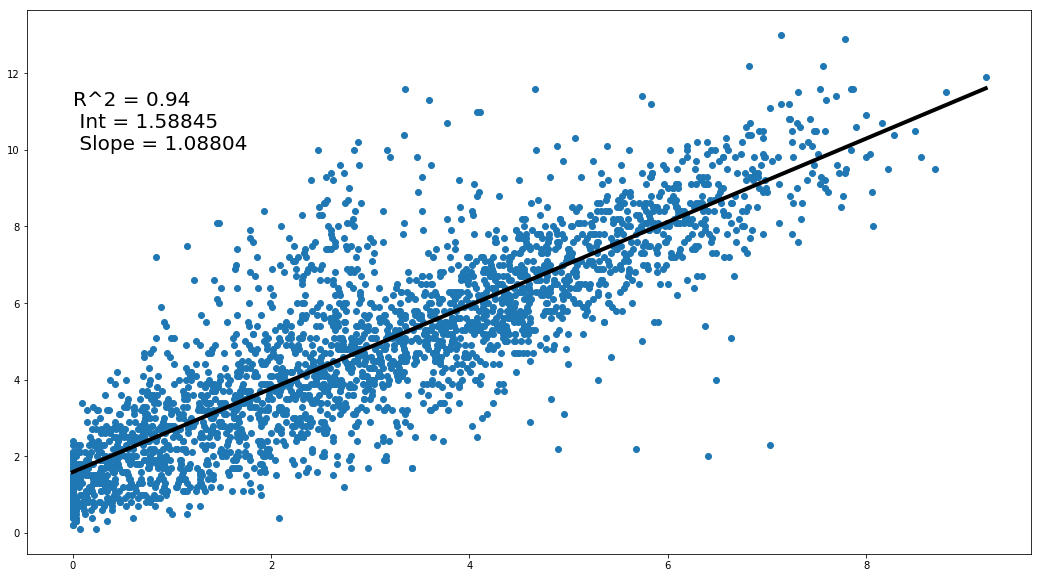

In [32]:
plt.figure(figsize=(18,10))
xData = HourlyMetData.loc[:,'Windspeed']
yData = ABlockWindDF.loc[HourlyMetData.loc[:,'Windspeed'].index]
plt.plot(xData,
         yData,
        'o')
ModTemp = sm.regression.linear_model.OLS(yData,  # Y variable
                                        sm.add_constant(xData), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(xData.min())
Xs.append(xData.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(xData.min(),10,fitR2,fontsize=20)

In [33]:
HourlyMetData.to_pickle('.\DataFrames\HourlyMet.pkl')